In [9]:
import yaml
import sys
import os
import pickle
import torch 
import numpy as np
from utils.model_utils import load_model
# import umap
import umap.umap_ as umap
from step_analysis import load_data,step_info, get_umap
from step_analysis import *
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [2]:
save_path = os.path.join('./results/')
if not os.path.exists(save_path): os.makedirs(save_path)

## head in the same layer

In [25]:
model_size, layer_id = '2.8b' , 20
umap_keys_list = []
# pythia 
save_path_tmp = os.path.join(save_path, 'pythia')
if not os.path.exists(save_path_tmp): os.makedirs(save_path_tmp)
revisions = [0] + [int(2**i) for i in range(0, 10)]  + list(range(1000, 143000, 5000))
model_name = f'EleutherAI/pythia-{model_size}'
for revision in revisions:
    if os.path.exists(os.path.join(save_path_tmp,model_size, f'{revision}.dat')):
        data = load_data(os.path.join(save_path_tmp,model_size, f'{revision}.dat'))
        keys = data['long'].key
        key = keys[layer_id]
        umap_keys = get_umap(key)
        umap_keys_list.append(umap_keys)

/Users/yangwang/anaconda3/envs/EE228HW/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/yangwang/anaconda3/envs/EE228HW/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/yangwang/anaconda3/envs/EE228HW/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/yangwang/anaconda3/envs/EE228HW/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/yangwang/anaconda3/envs/EE228HW/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Gr

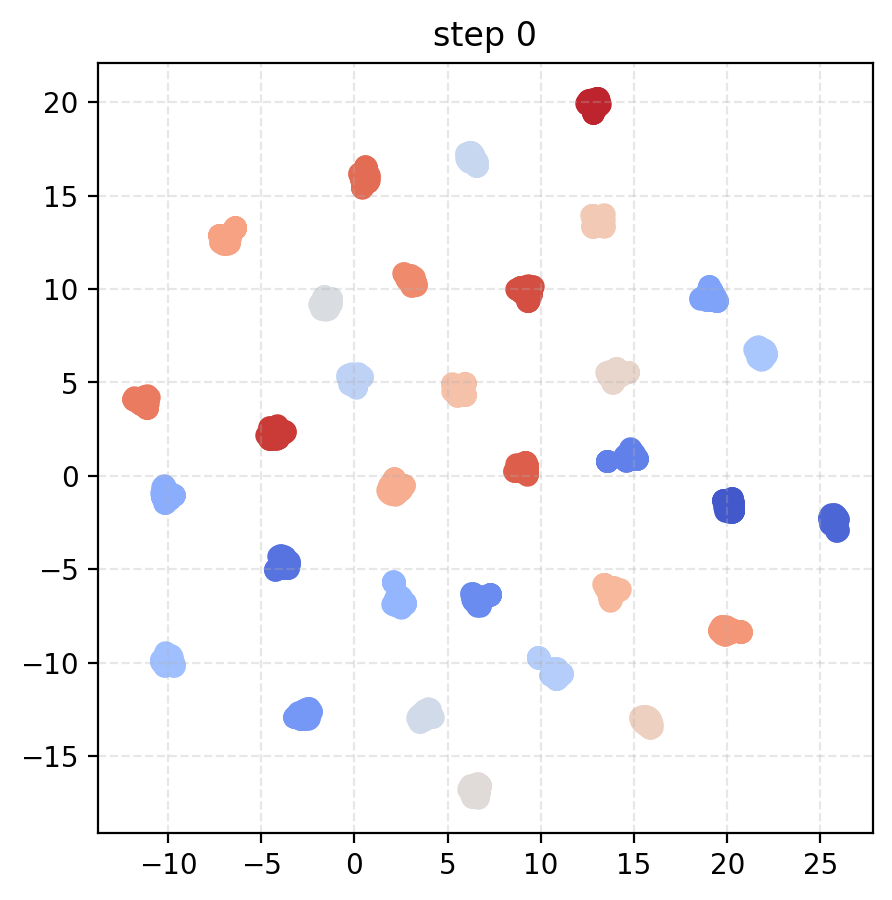

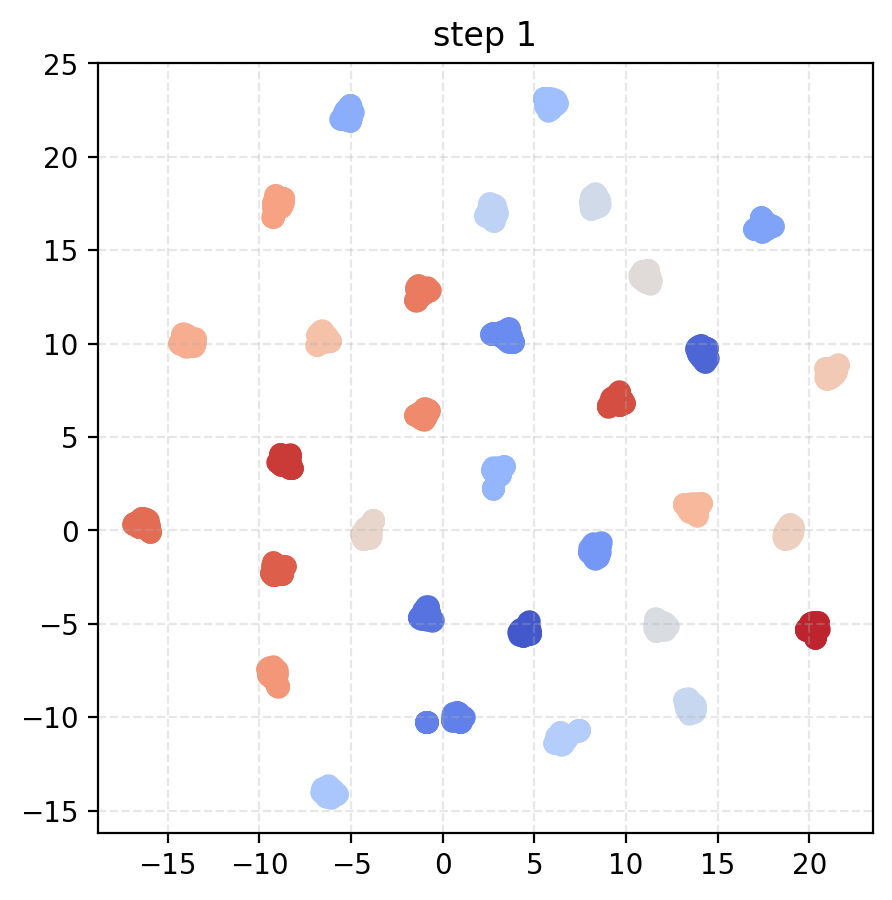

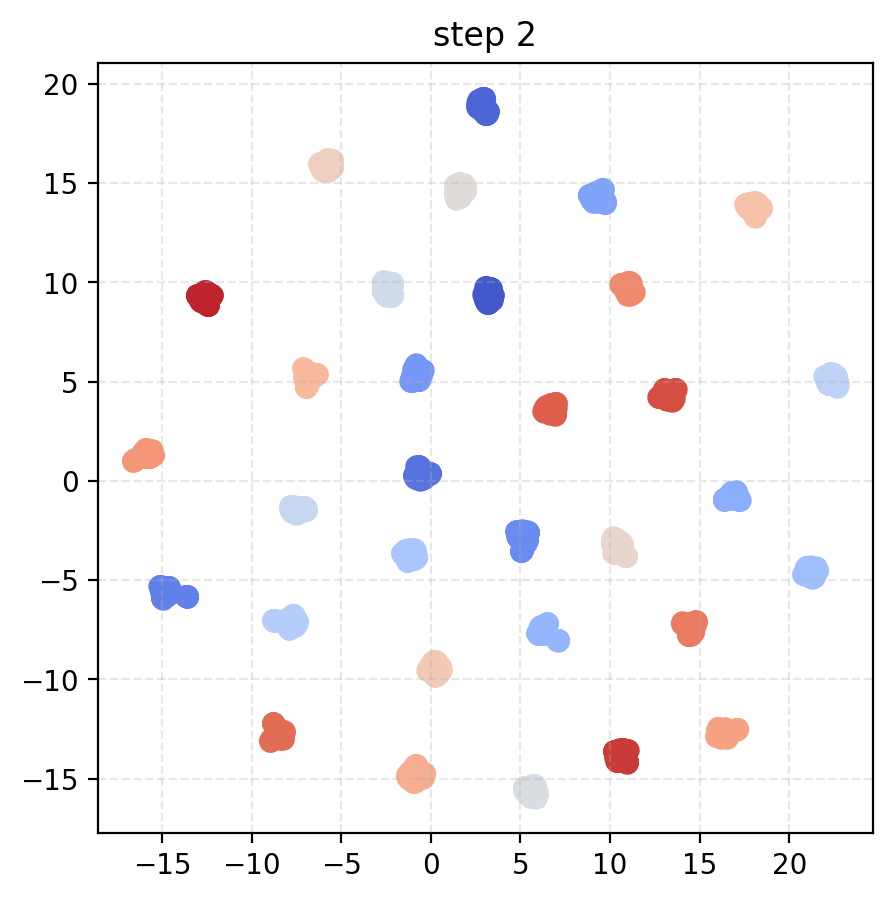

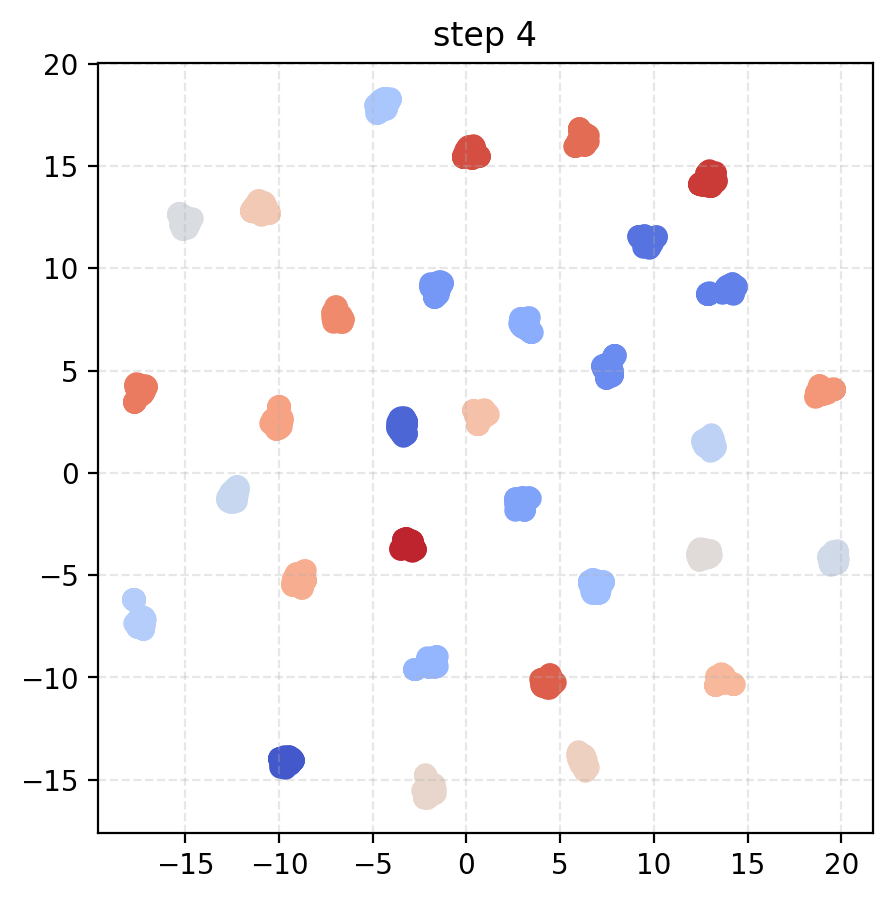

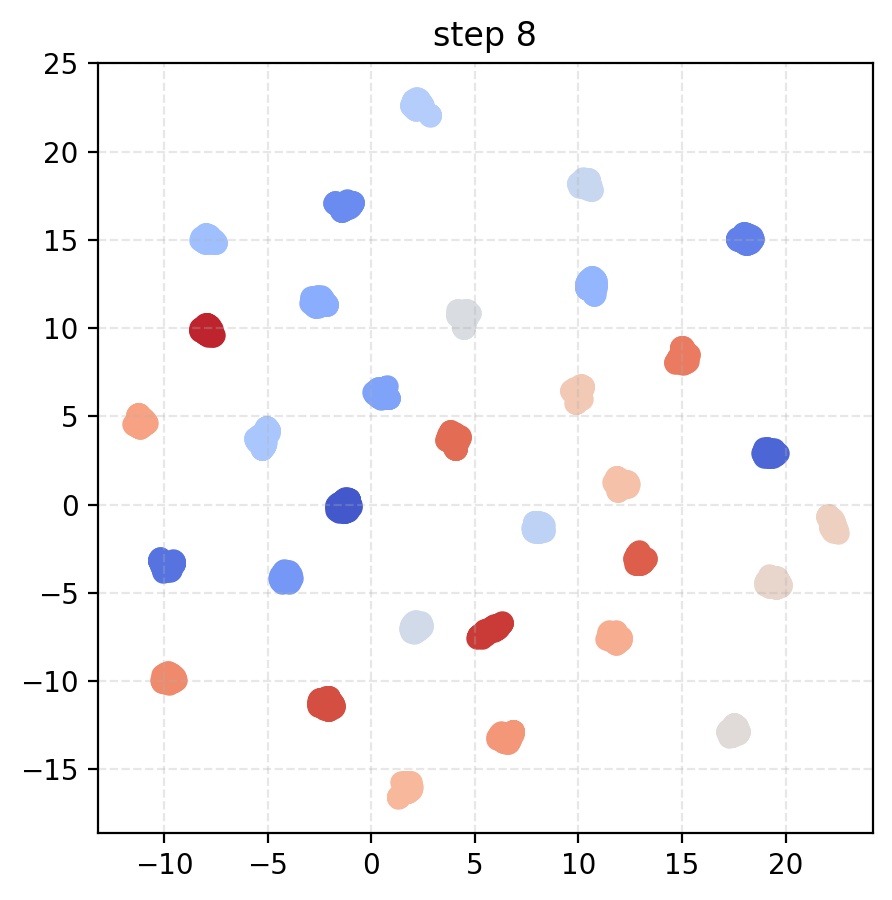

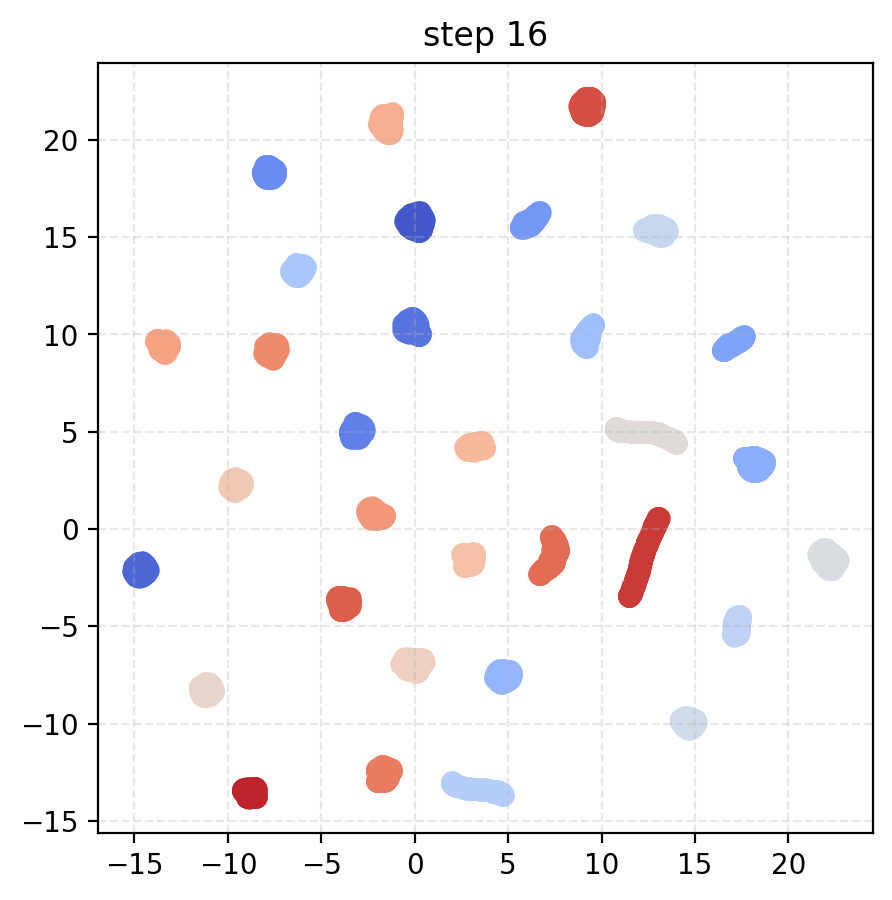

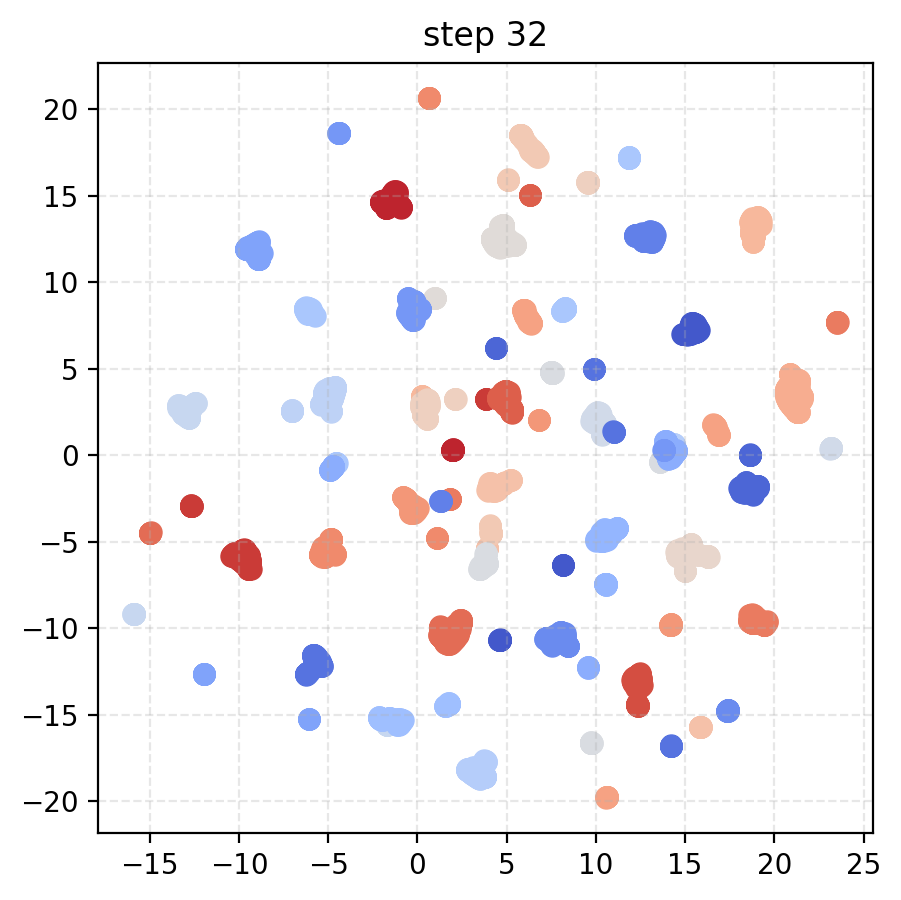

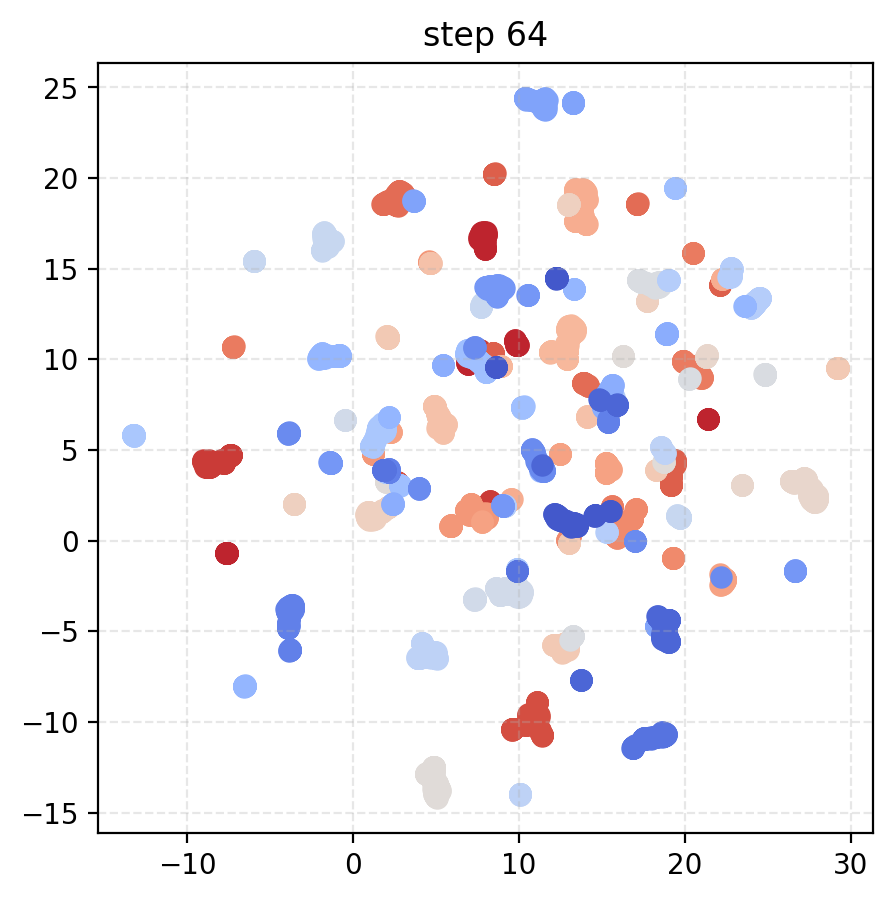

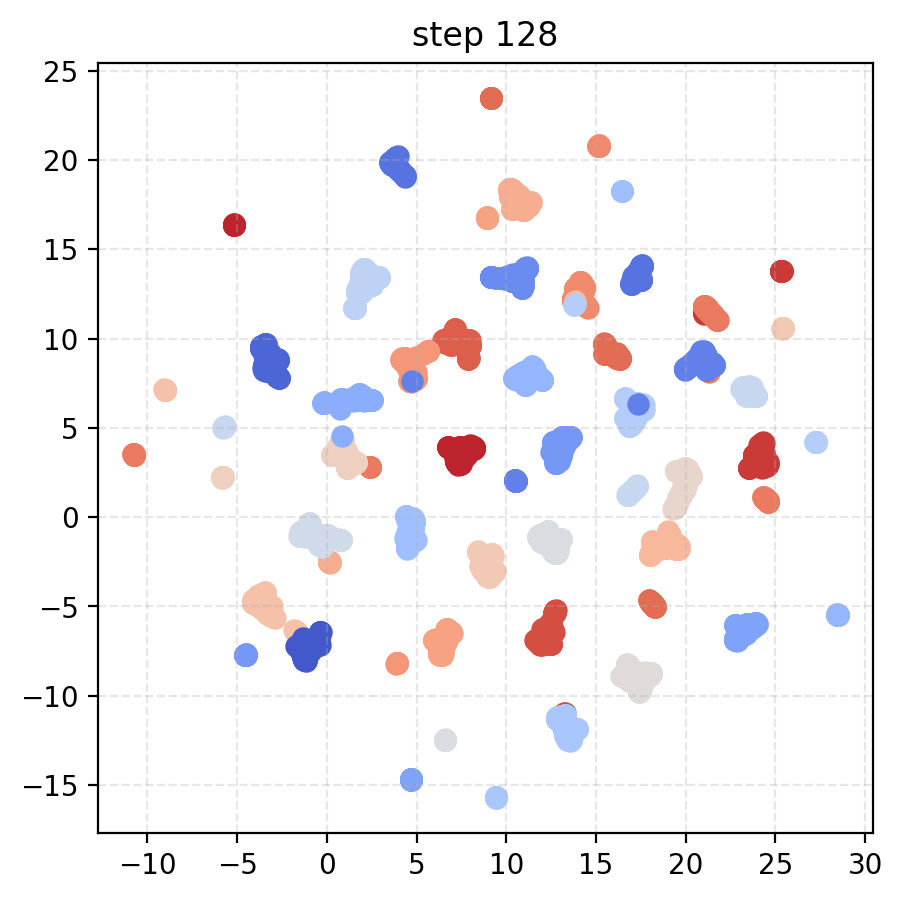

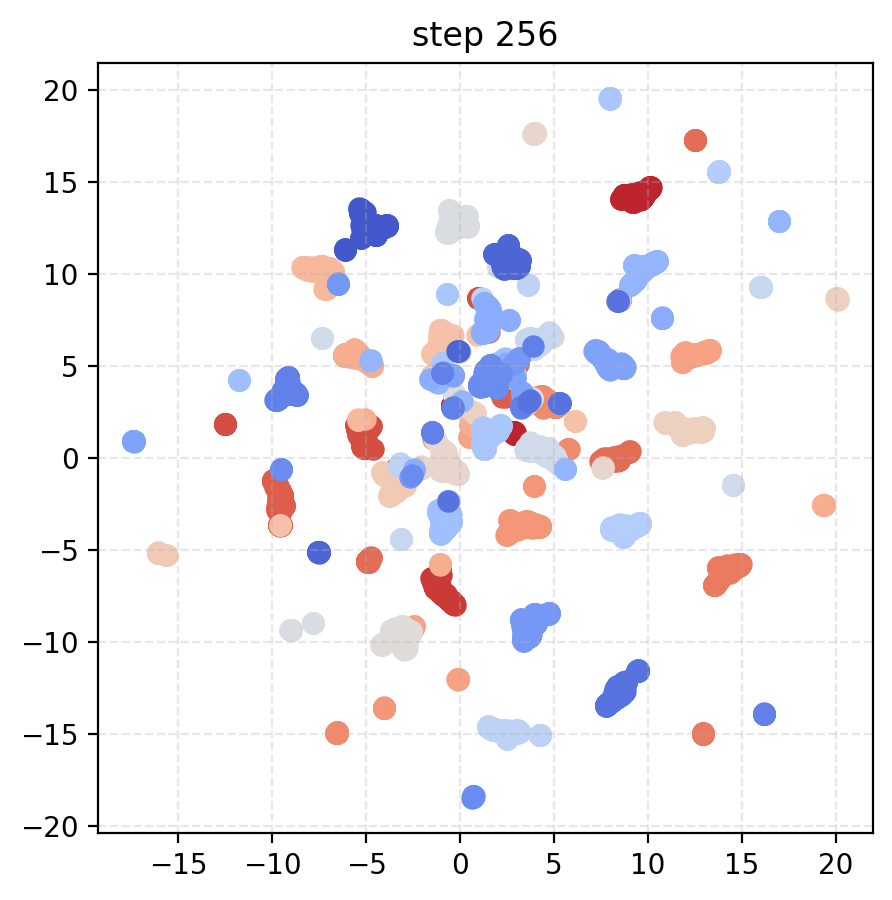

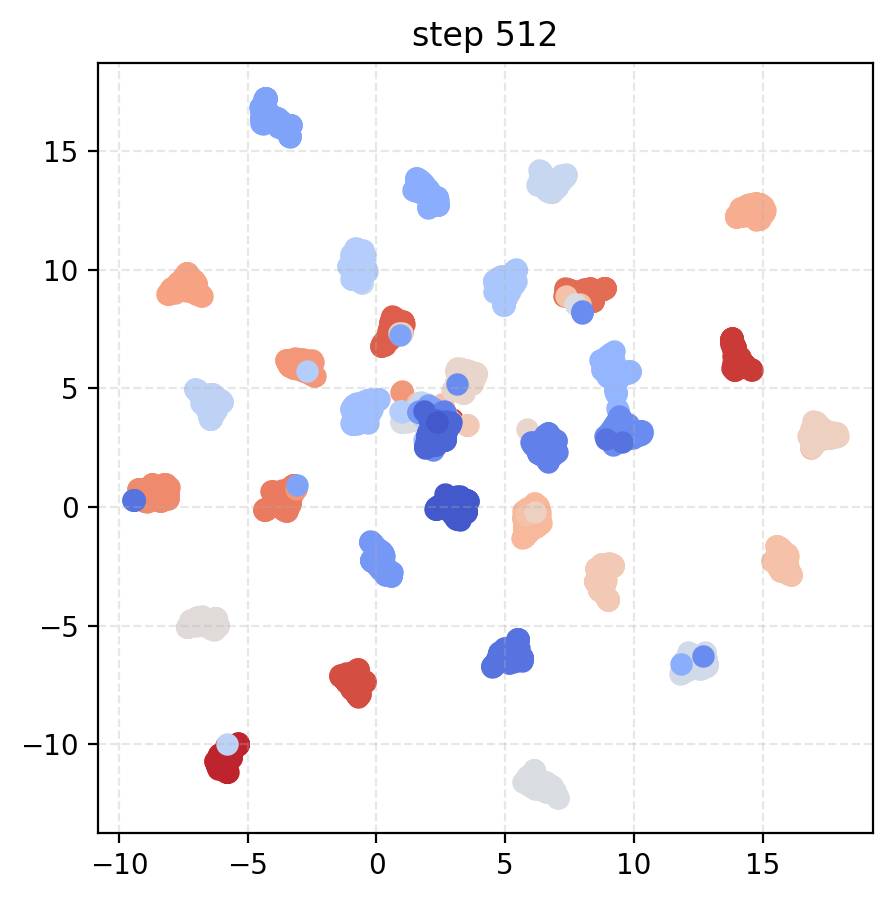

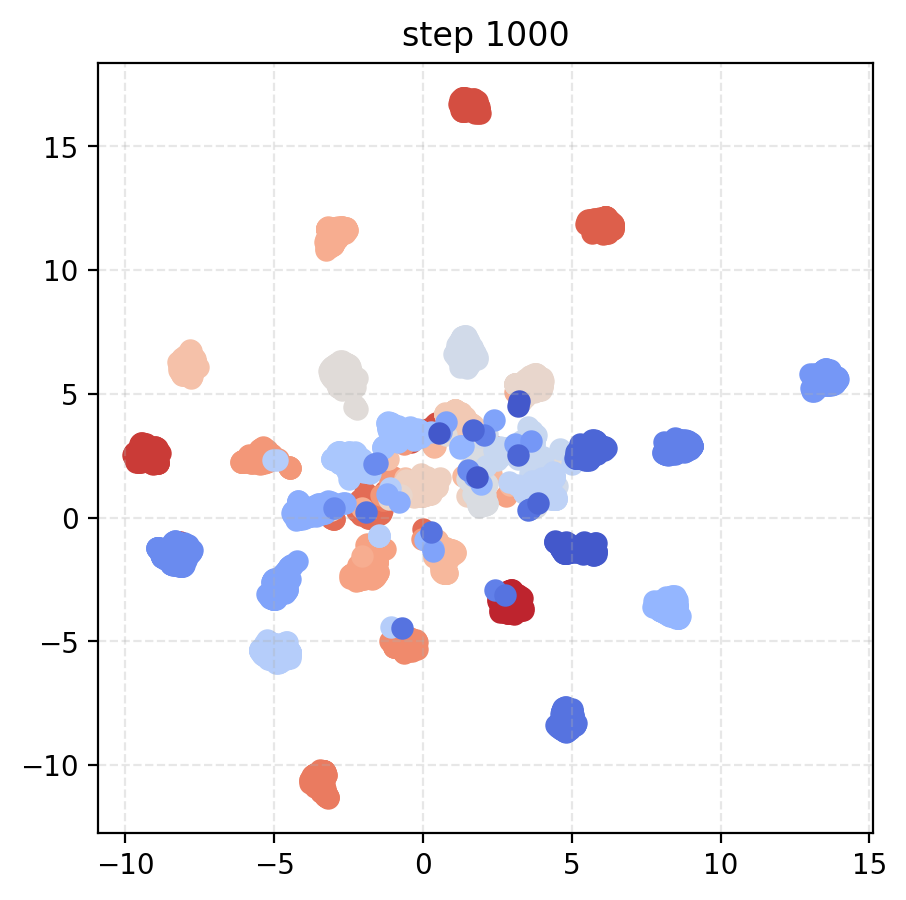

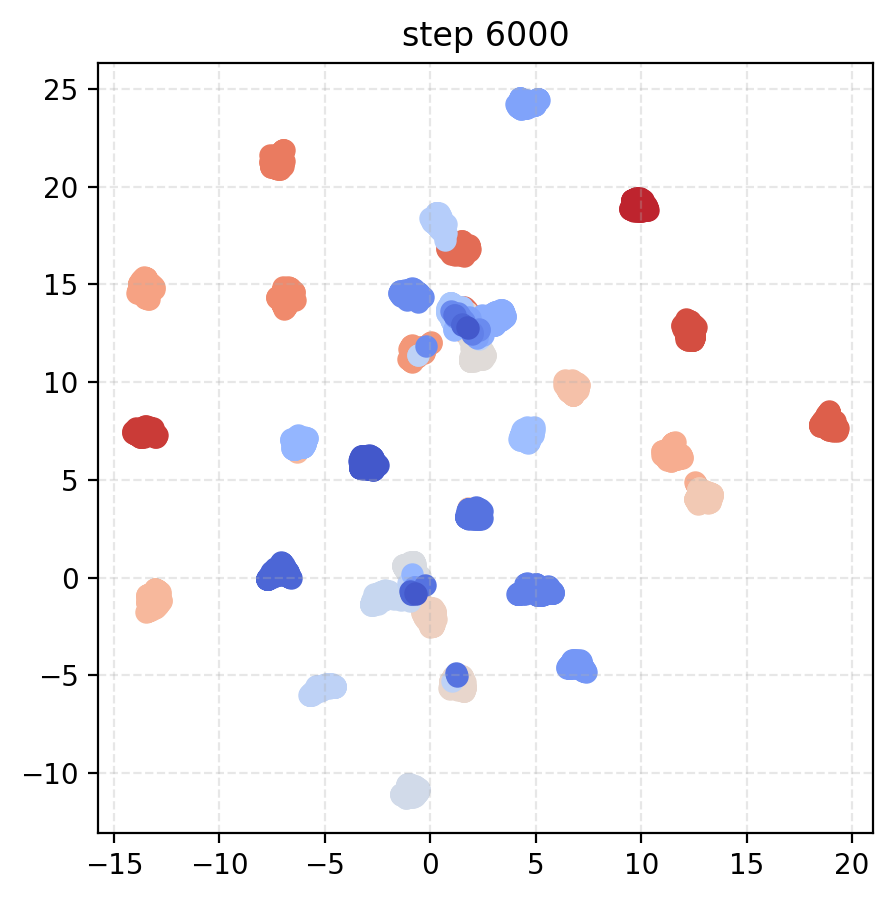

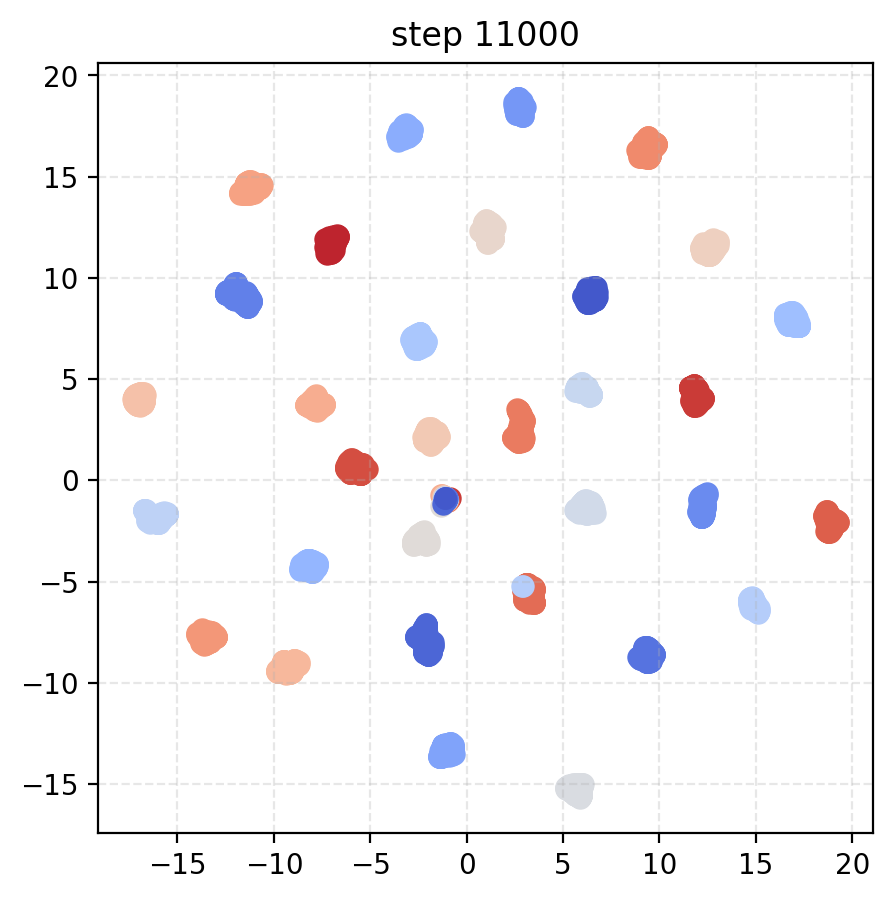

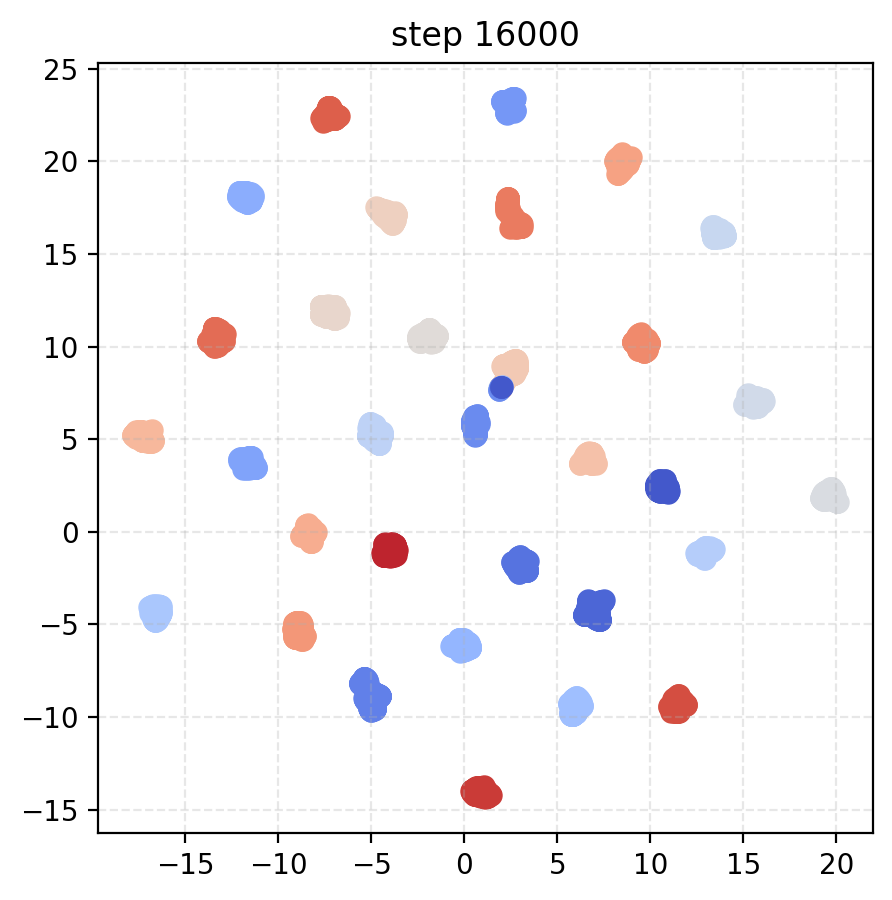

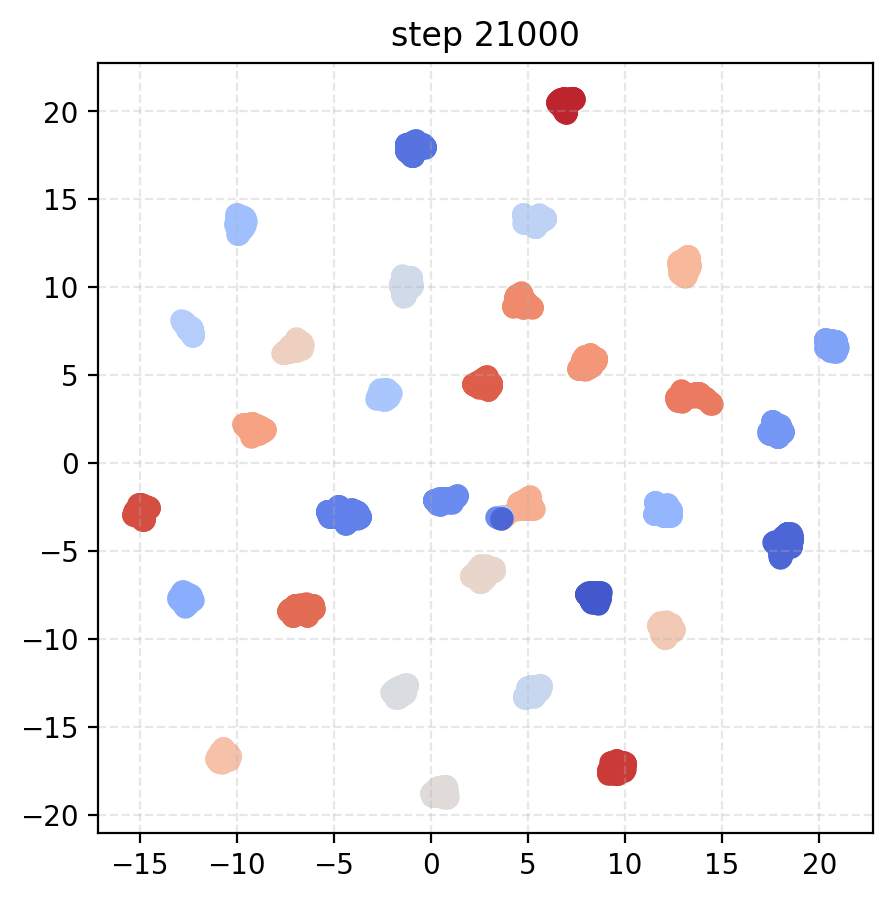

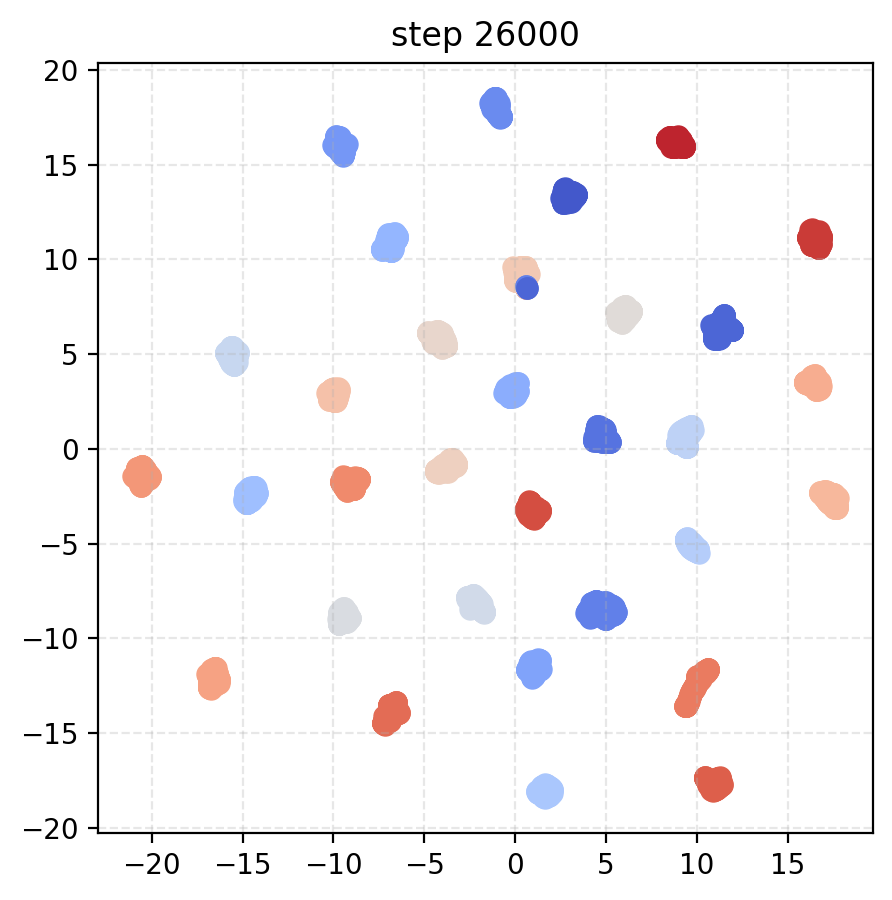

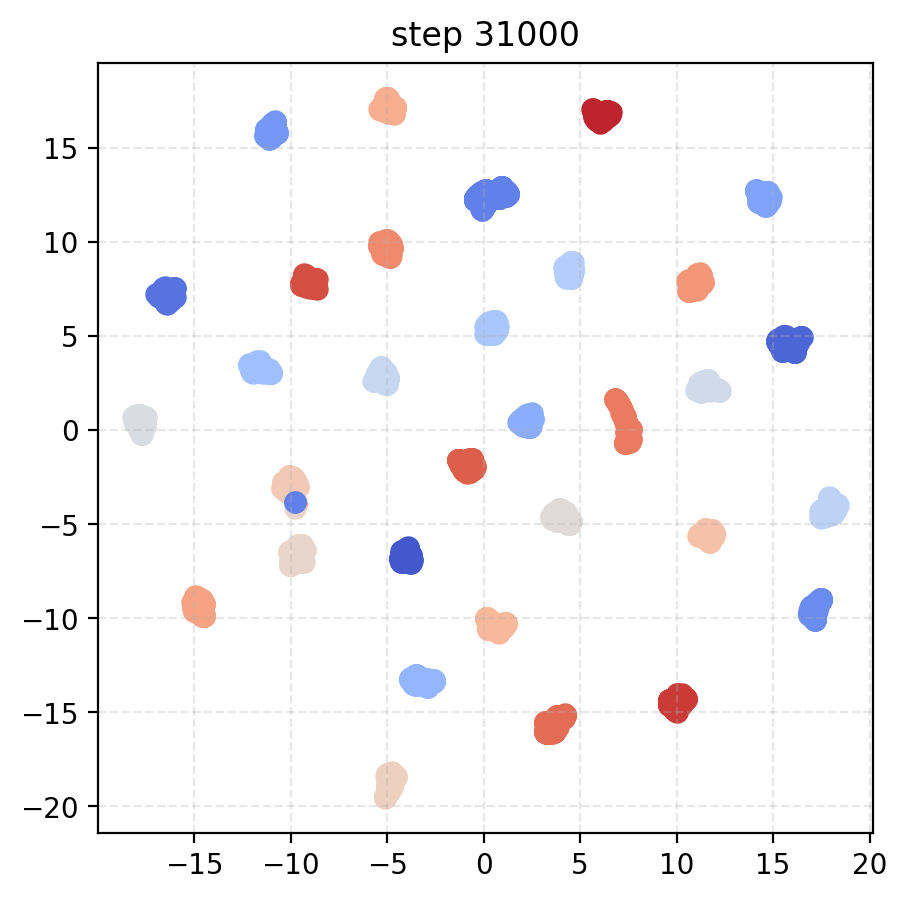

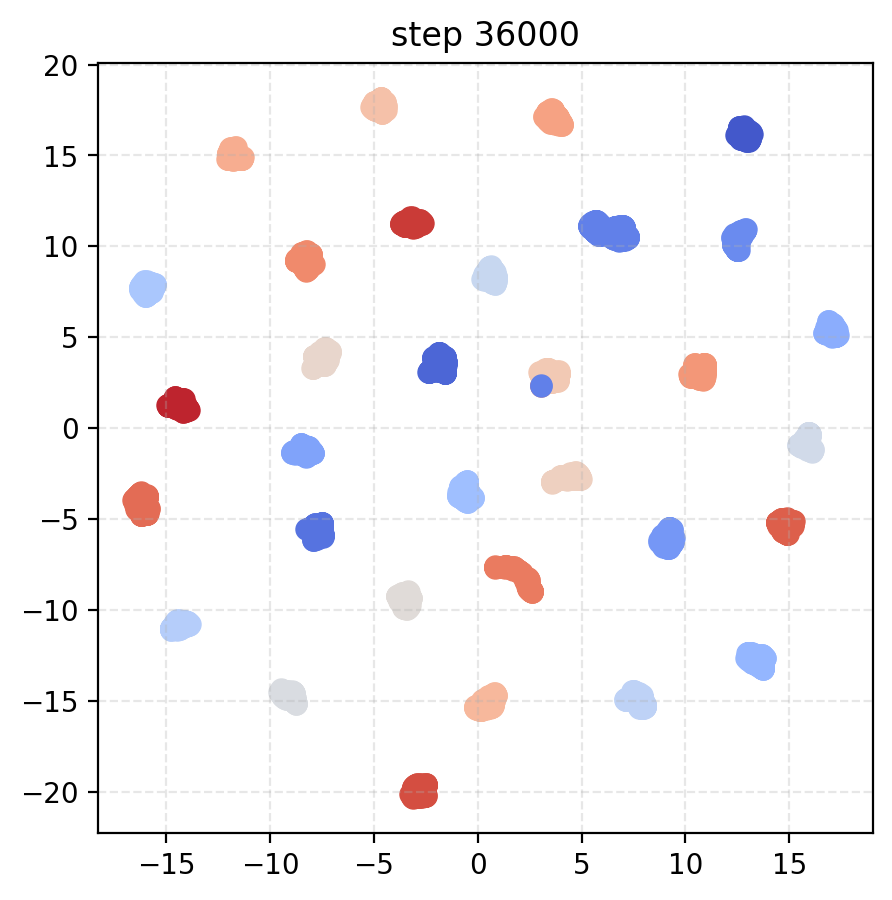

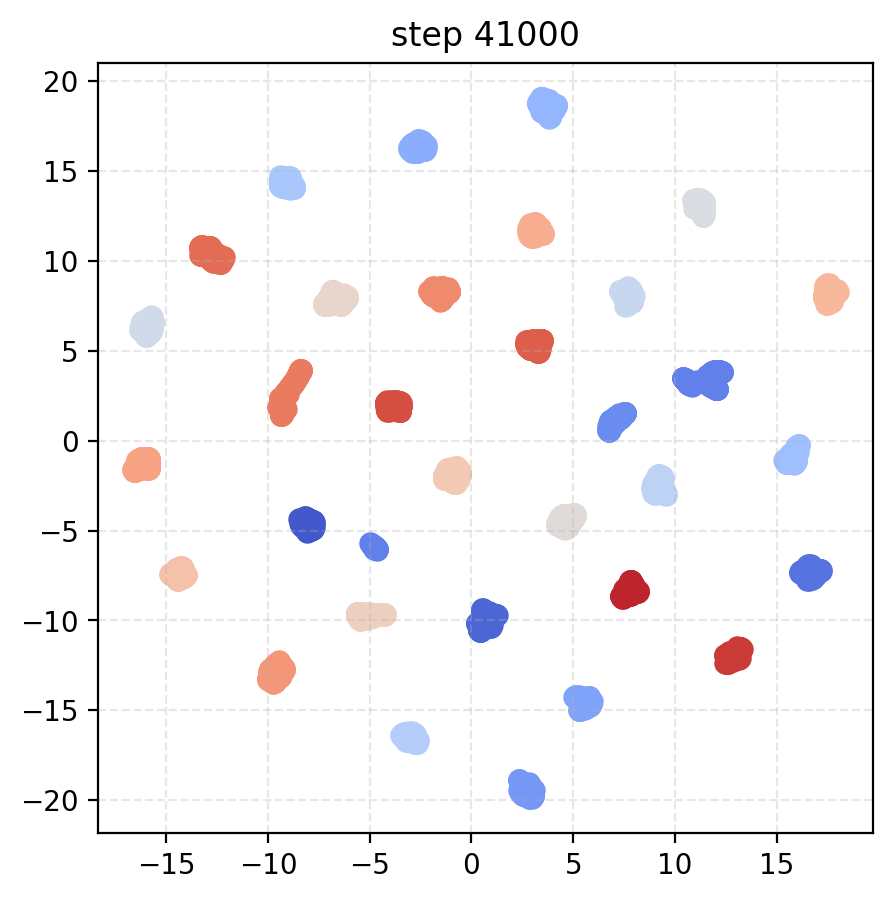

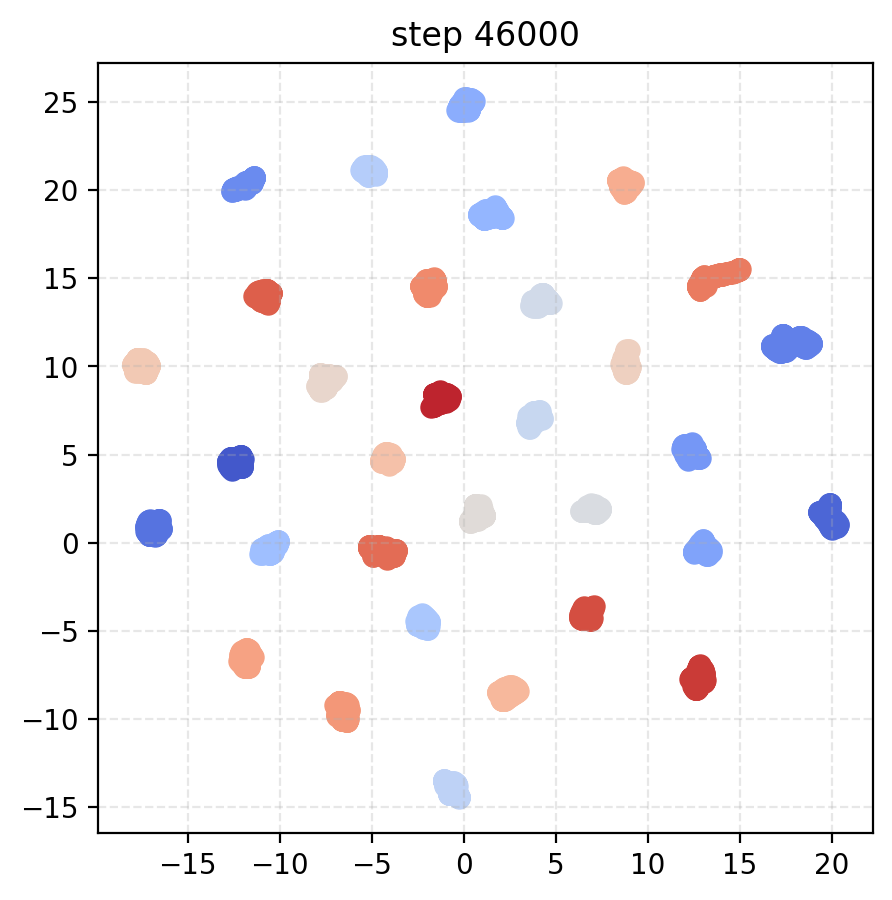

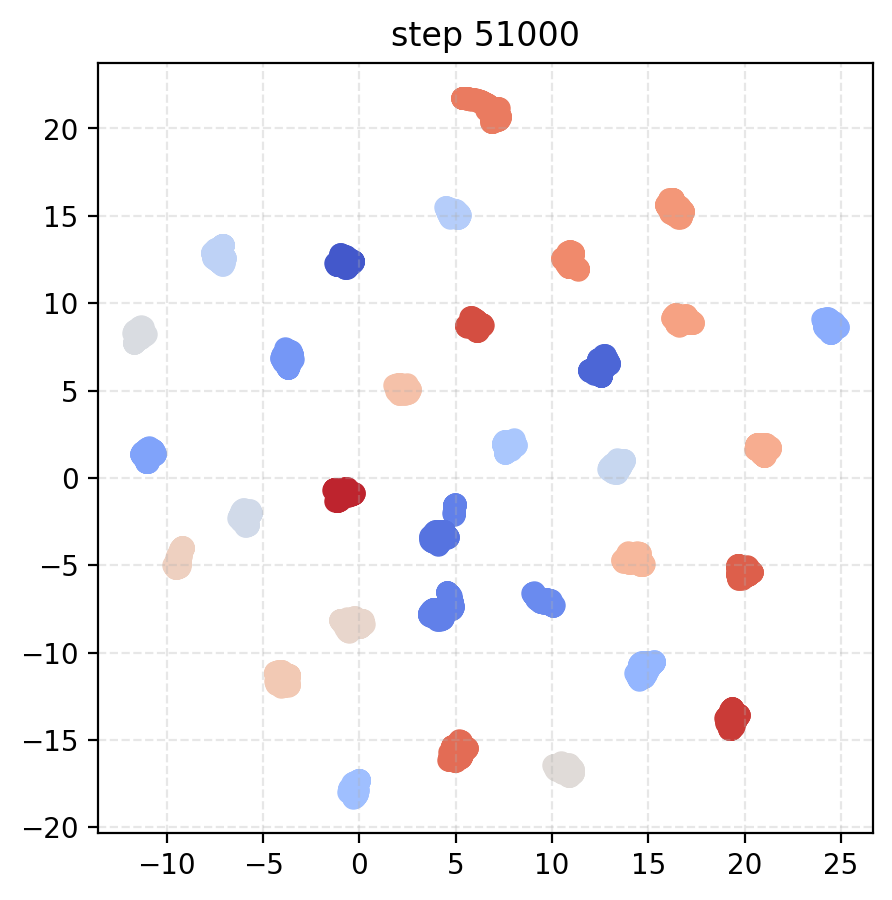

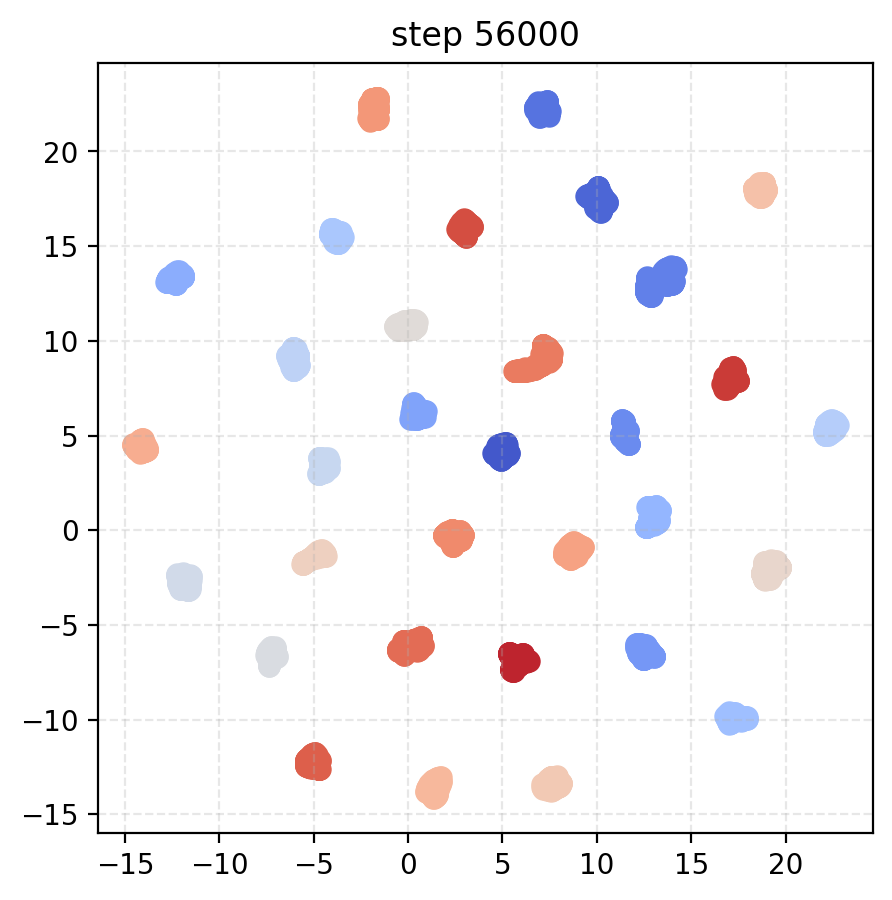

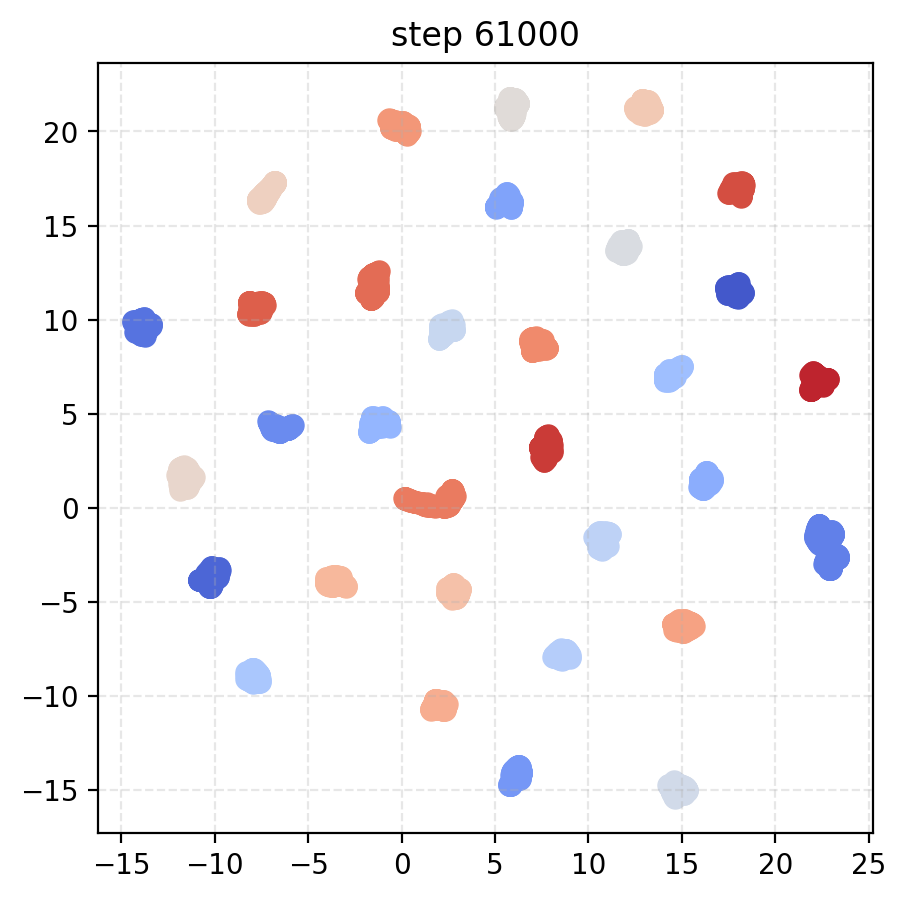

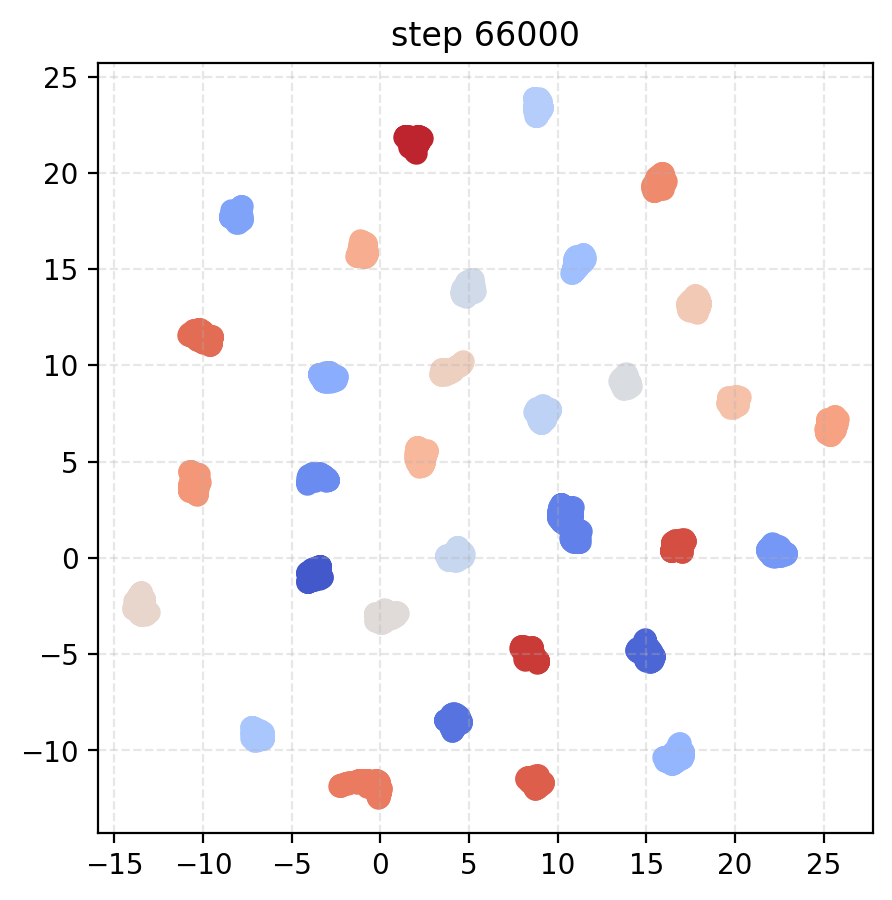

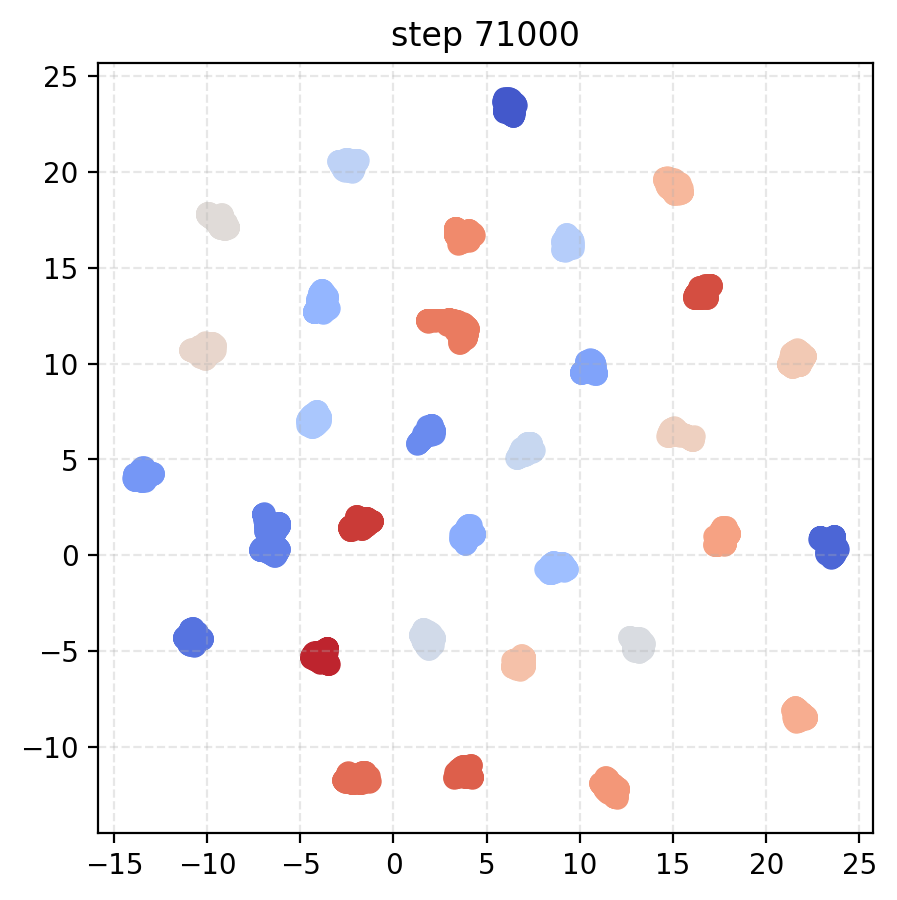

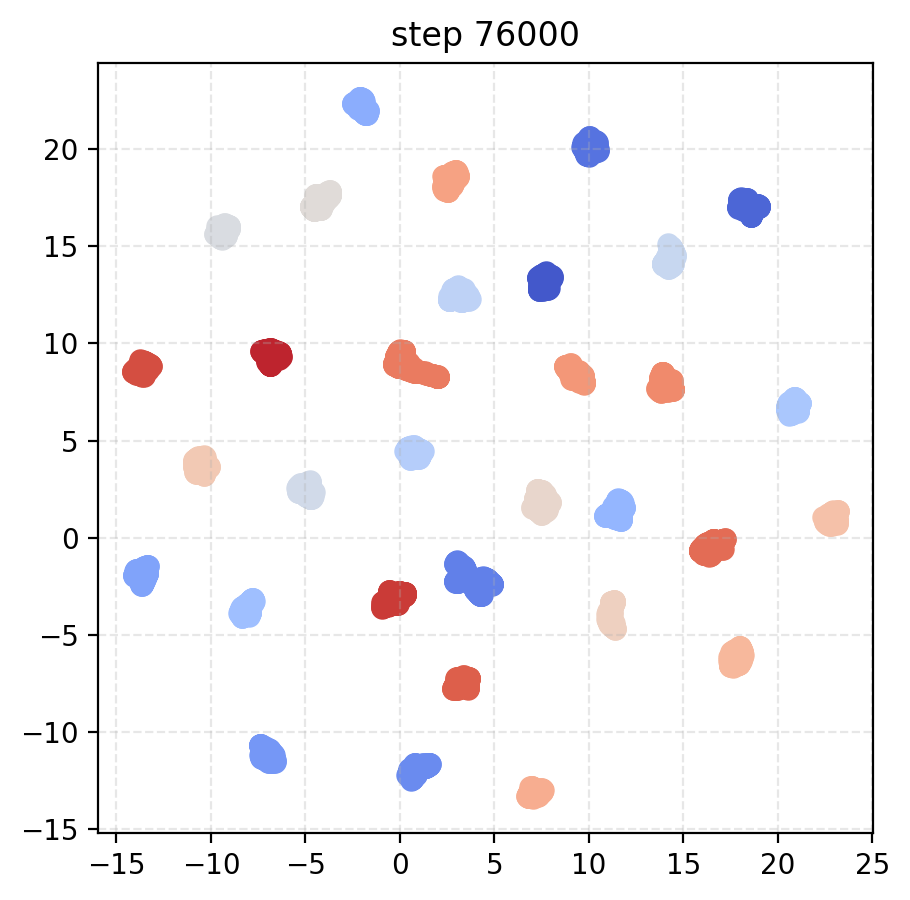

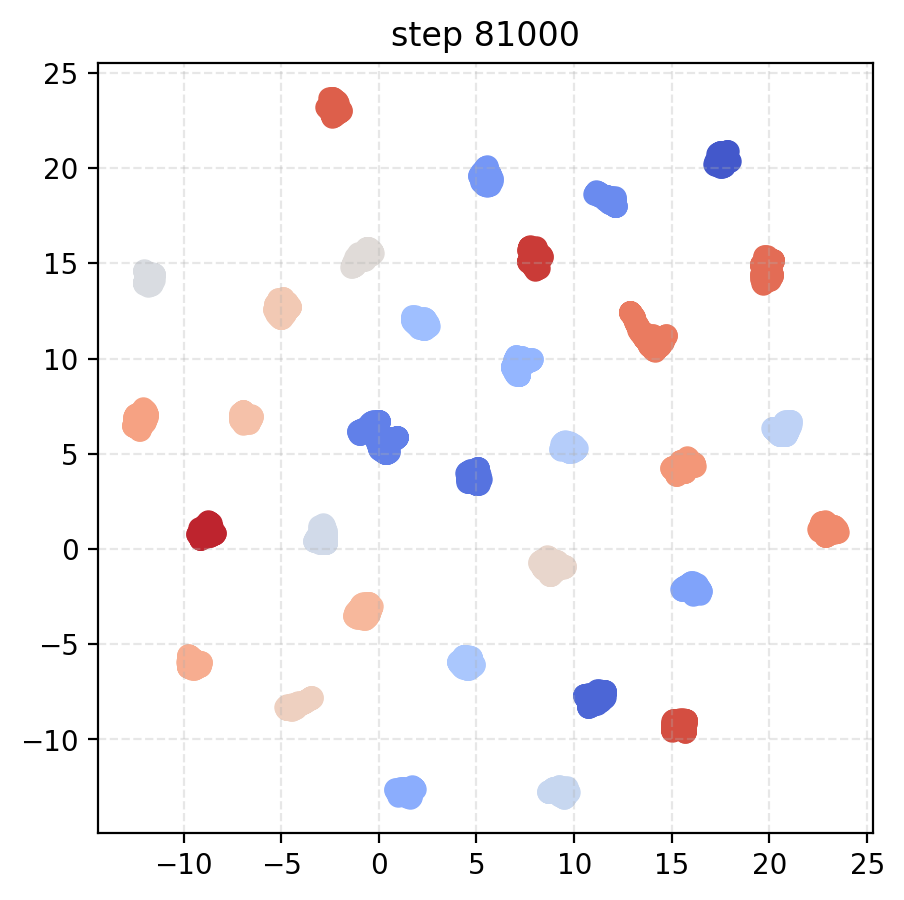

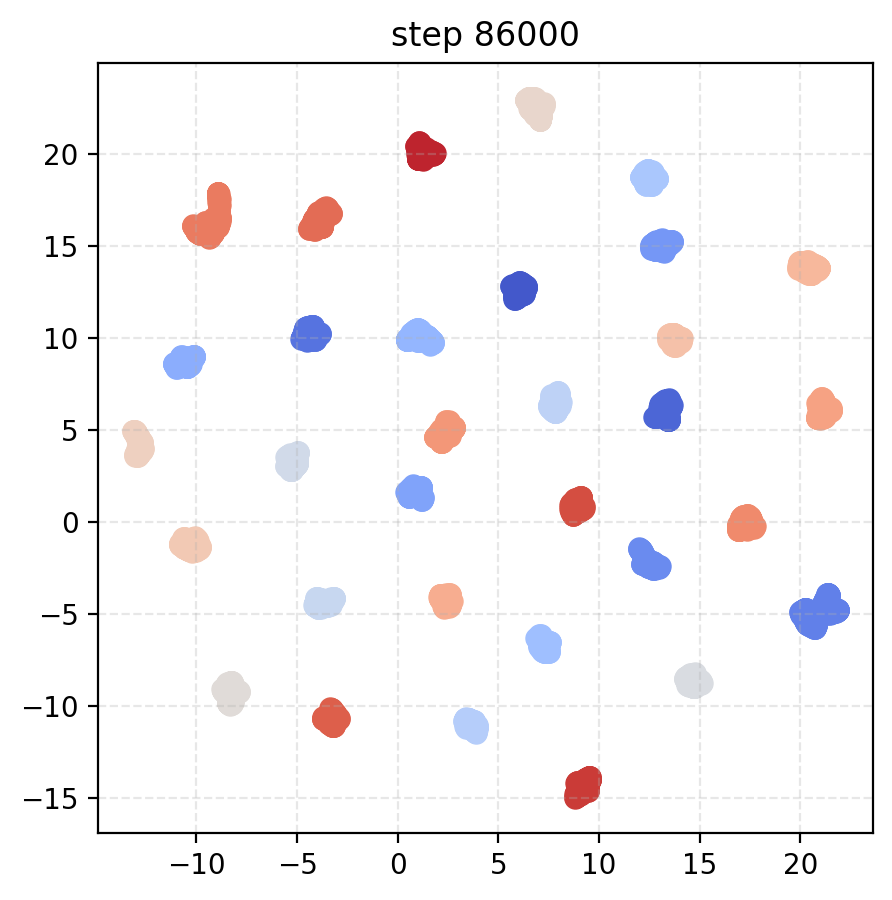

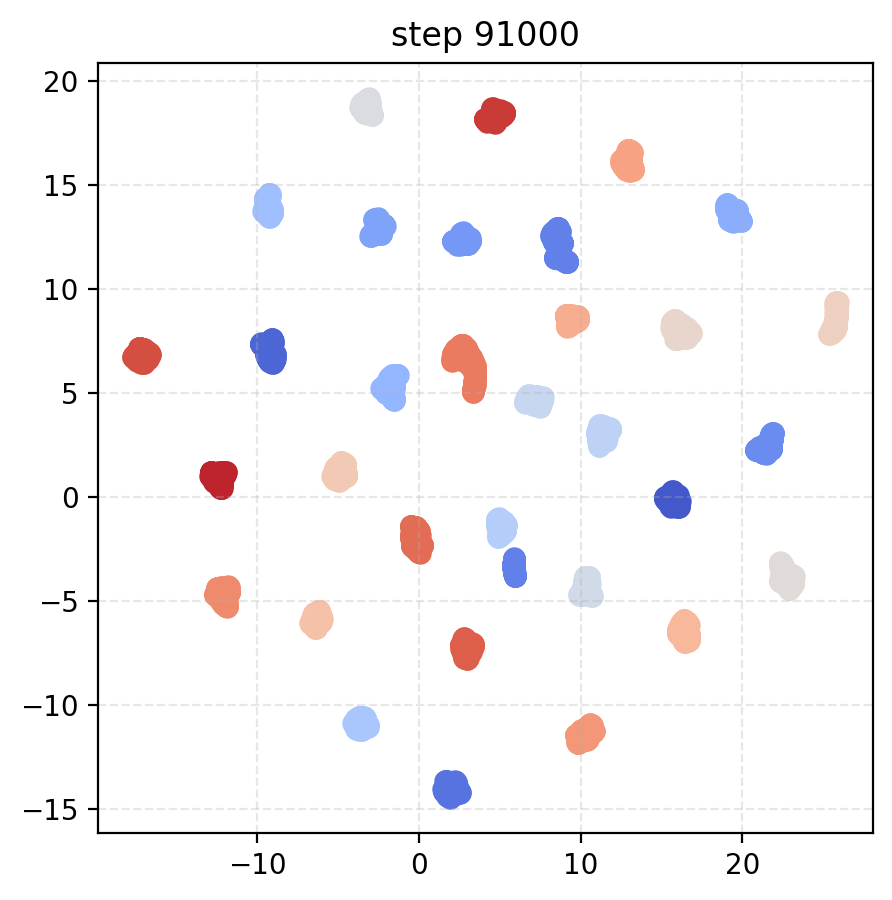

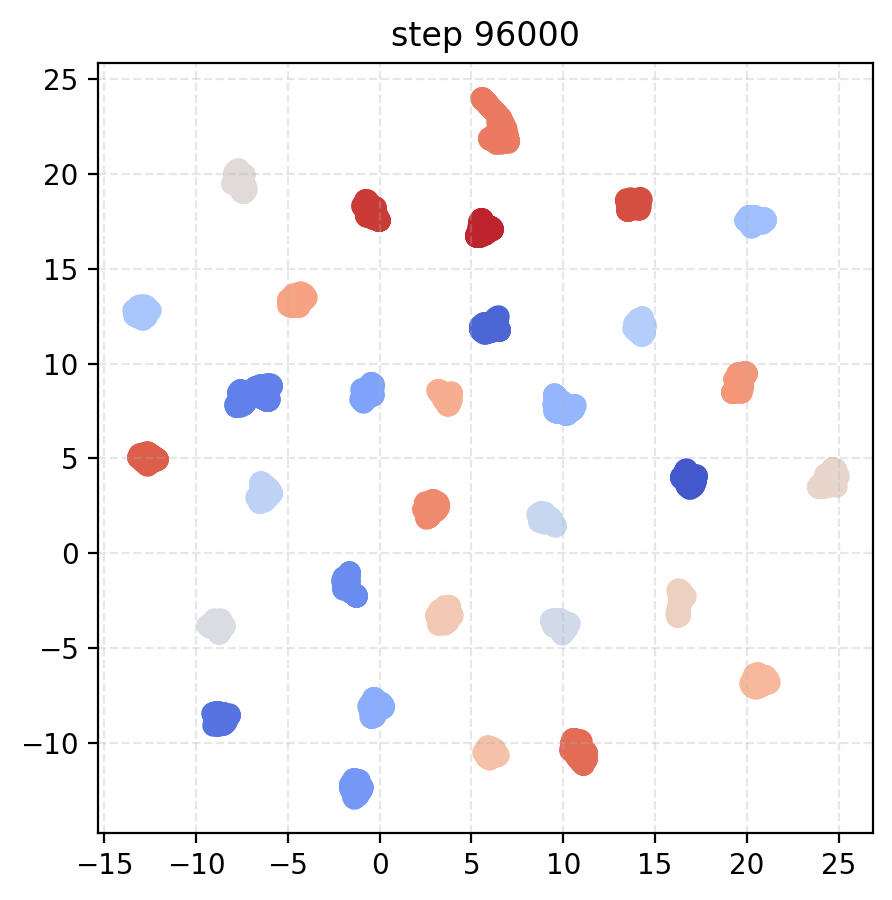

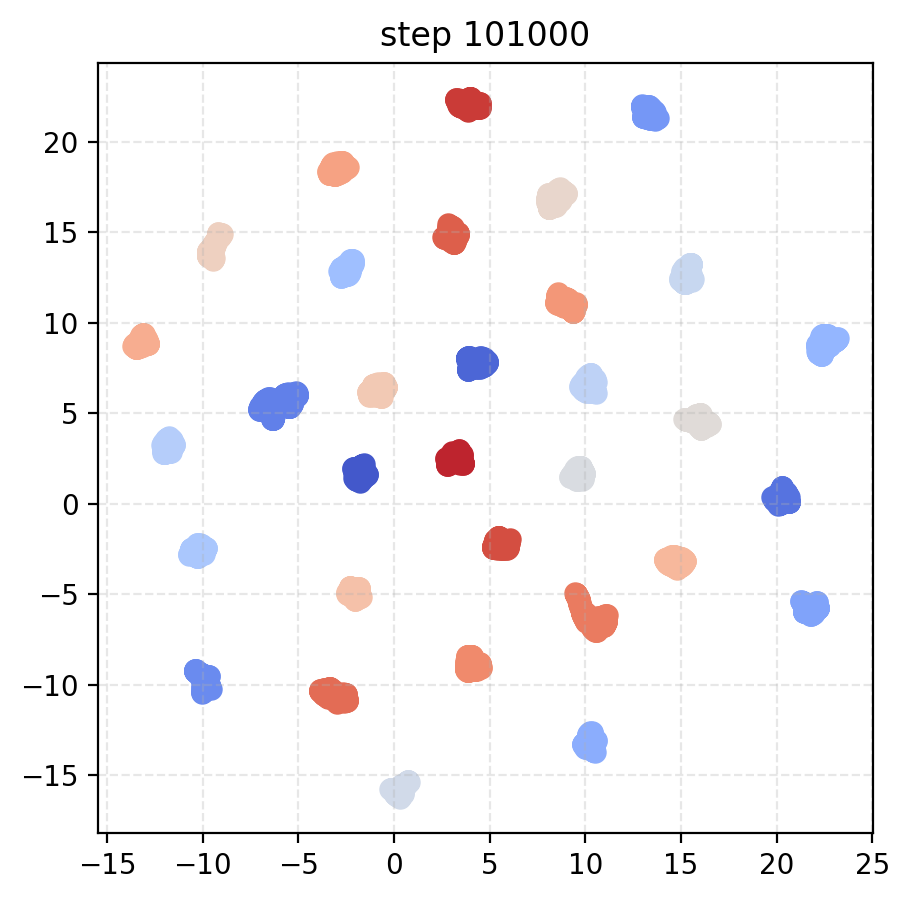

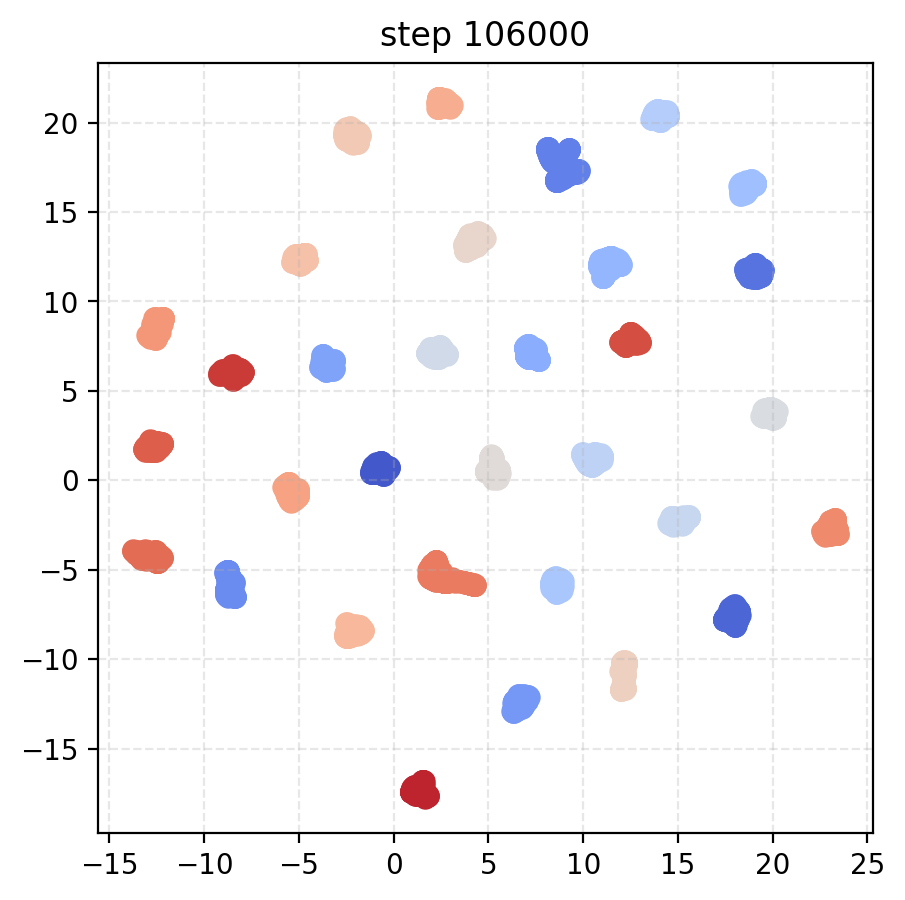

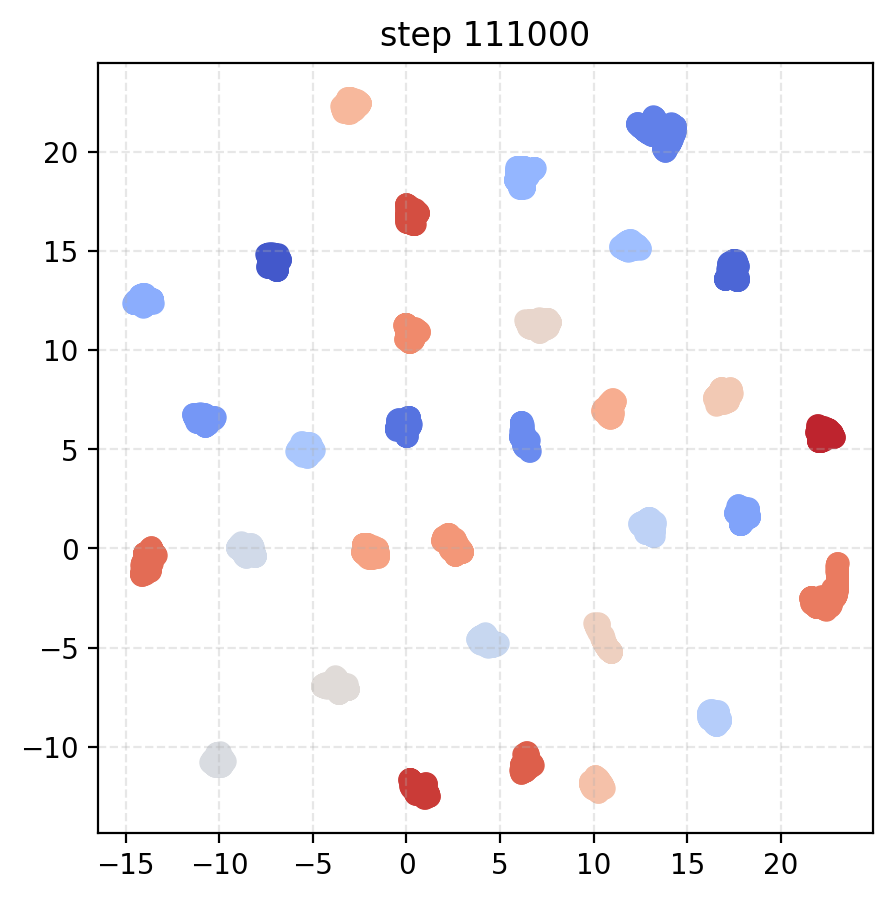

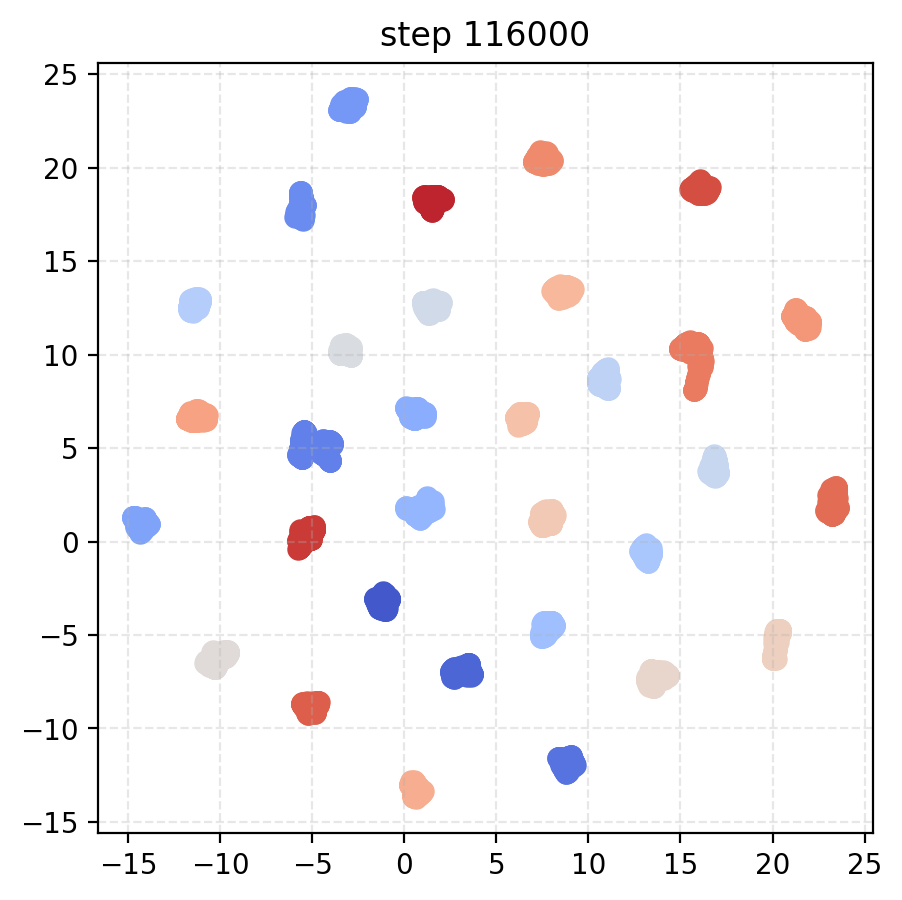

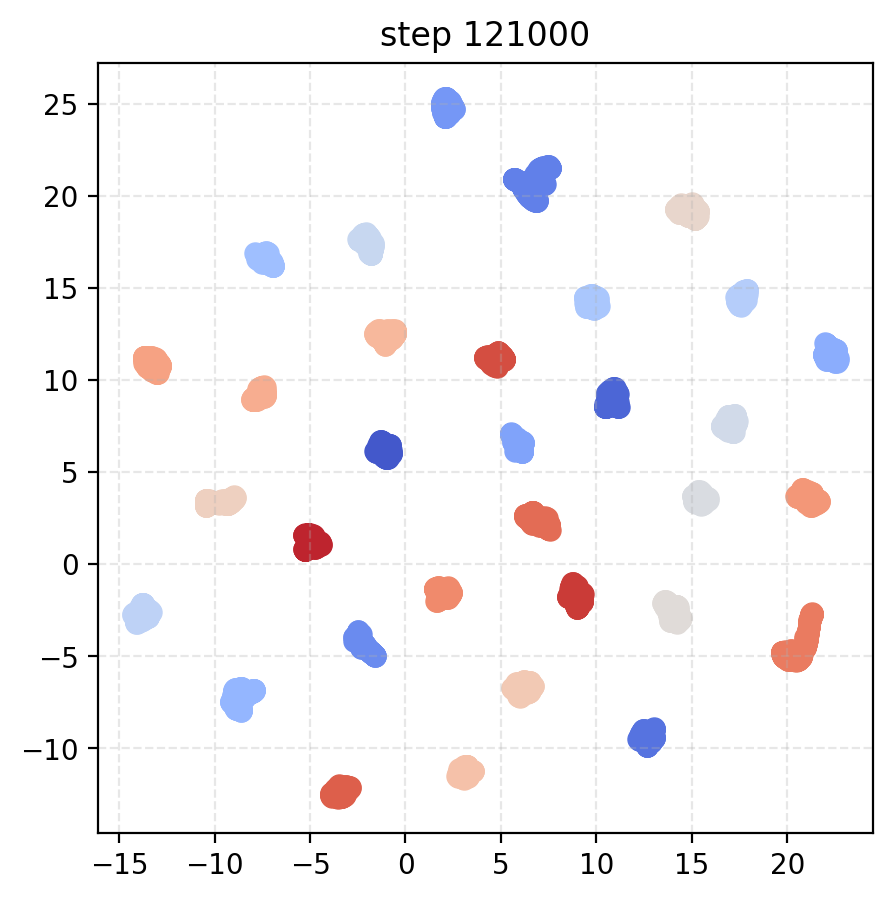

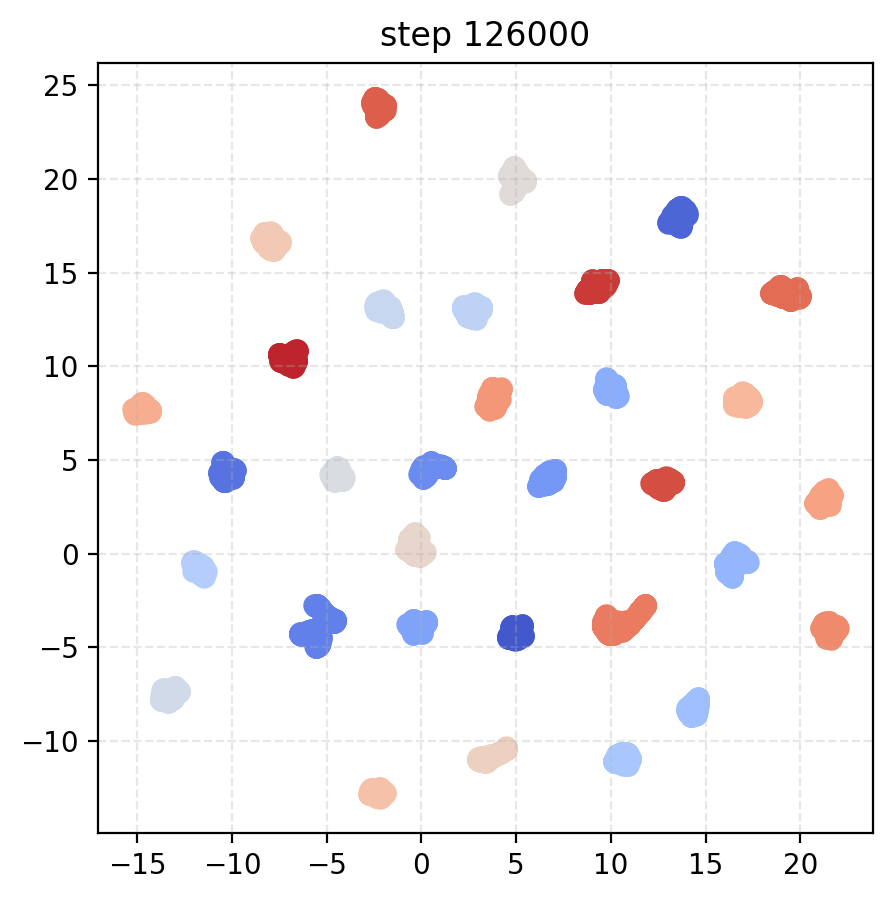

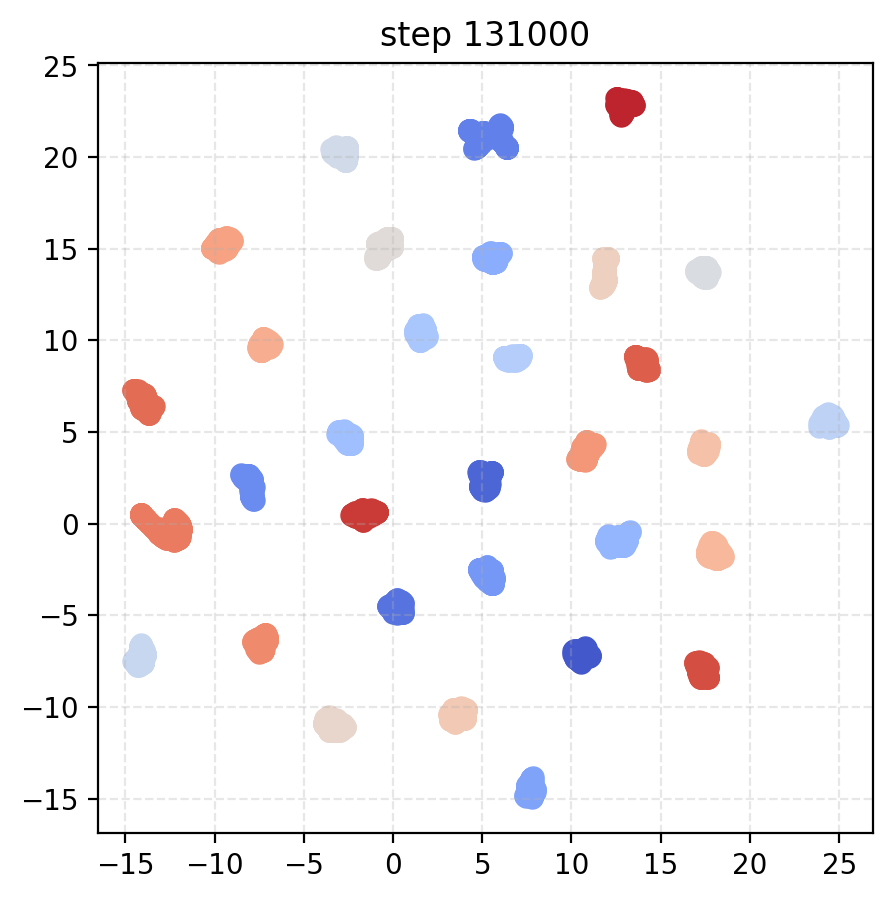

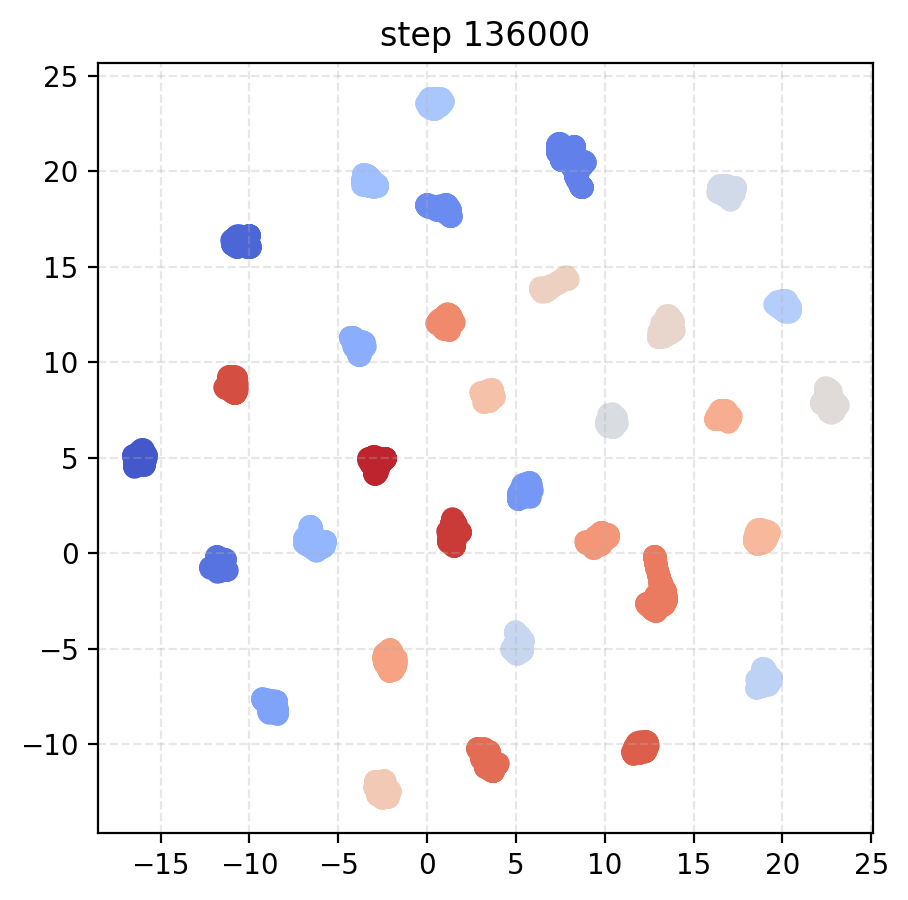

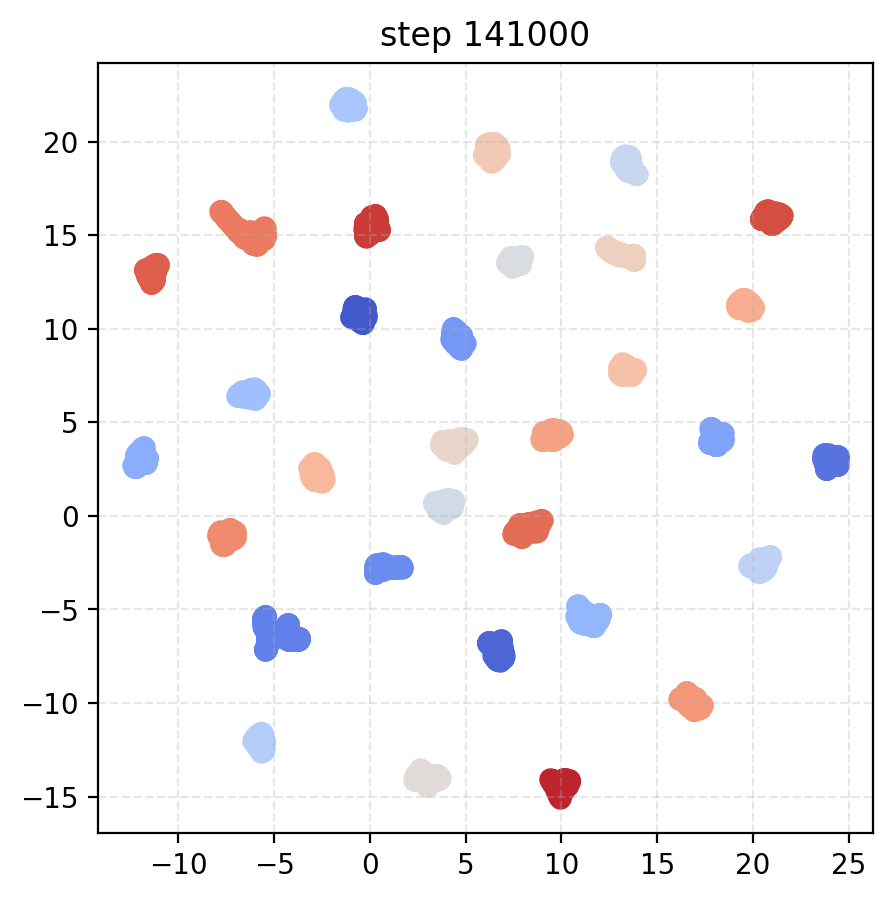

In [26]:
revisions = [0] + [int(2**i) for i in range(0, 10)]  + list(range(1000, 143000, 5000))
for i in range(len(umap_keys_list)):
    umap_keys = umap_keys_list[i]
    plt.subplots(figsize=(5,5), dpi=200)
    colors = sns.color_palette('coolwarm_r', umap_keys.shape[0])
    for head_id in range(umap_keys.shape[0]):
        plt.scatter(umap_keys[head_id, :,0], umap_keys[head_id, :,1], color=colors[head_id], s=50, )
    plt.grid(linestyle="--", alpha=0.3)
    plt.title(f'step {revisions[i]}')
    plt.show()

In [20]:
## instruct
layer_id = 20
umap_keys_list = dict()
models = ['meta-llama/Llama-2-7b-hf', 'meta-llama/Llama-2-7b-chat-hf',
        'meta-llama/Llama-2-13b-hf', 'meta-llama/Llama-2-13b-chat-hf',
        'Qwen/Qwen2-7B' , 'Qwen/Qwen2-7B-Instruct',
        'Qwen/Qwen2-1.5B', 'Qwen/Qwen2-1.5B-Instruct']
save_path_tmp = save_path
for model_name in models:
    p = model_name.split('/')[1]
    if os.path.exists(os.path.join(save_path_tmp, f'{p}.dat')):
        data = load_data(os.path.join(save_path_tmp, f'{p}.dat'))
        keys = data['long'].key
        key = keys[layer_id]
        umap_keys = get_umap(key)
        umap_keys_list[p] = umap_keys

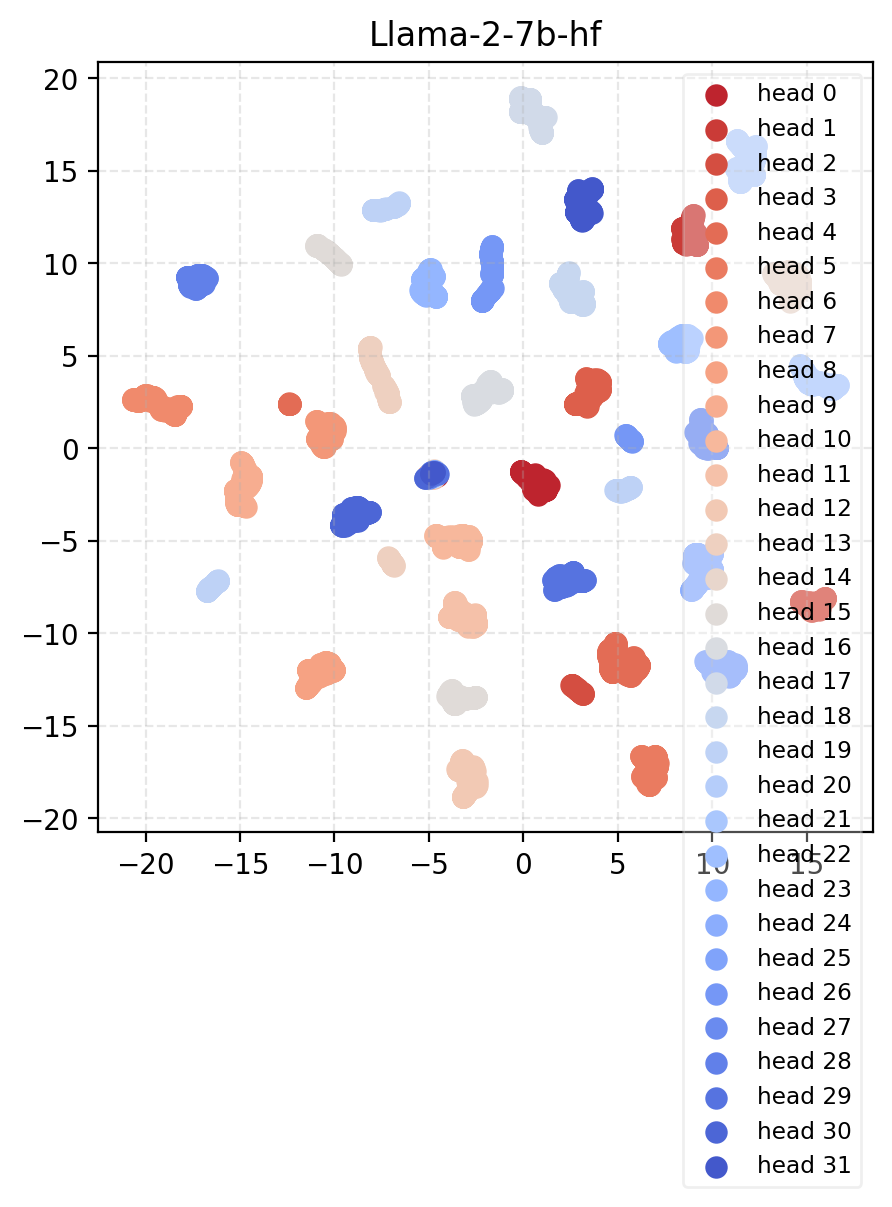

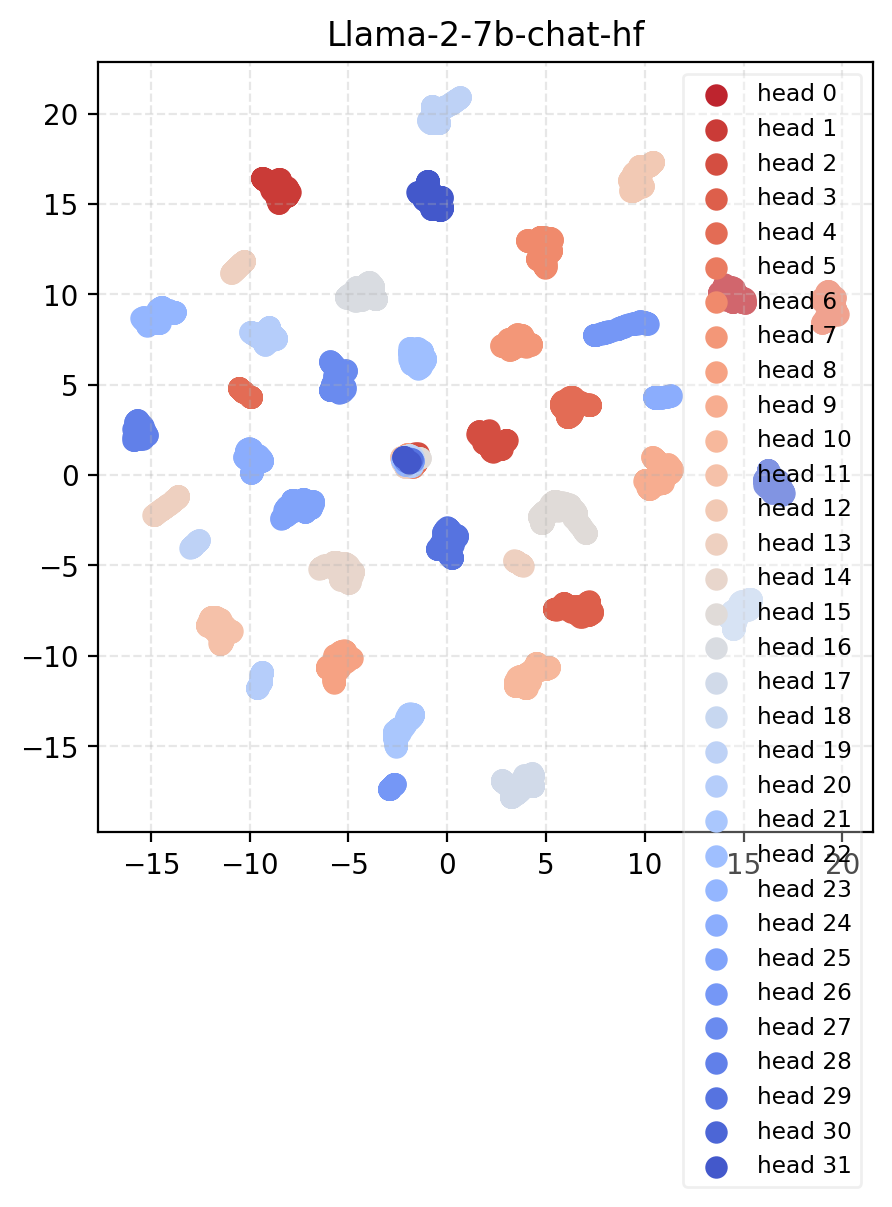

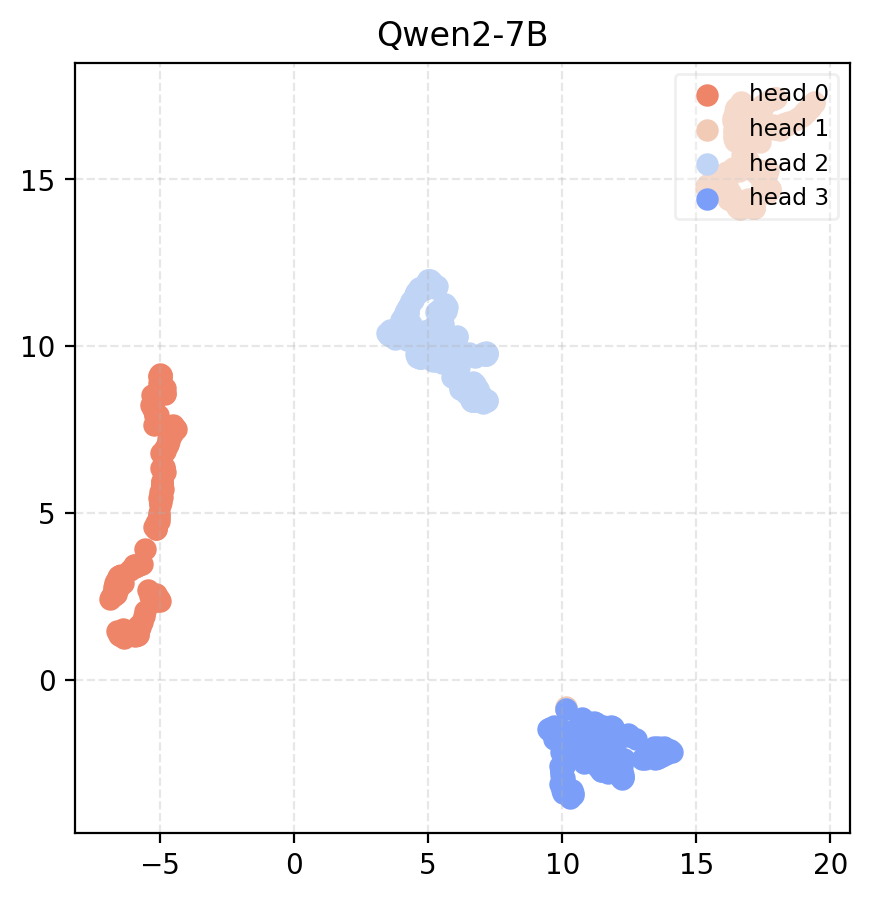

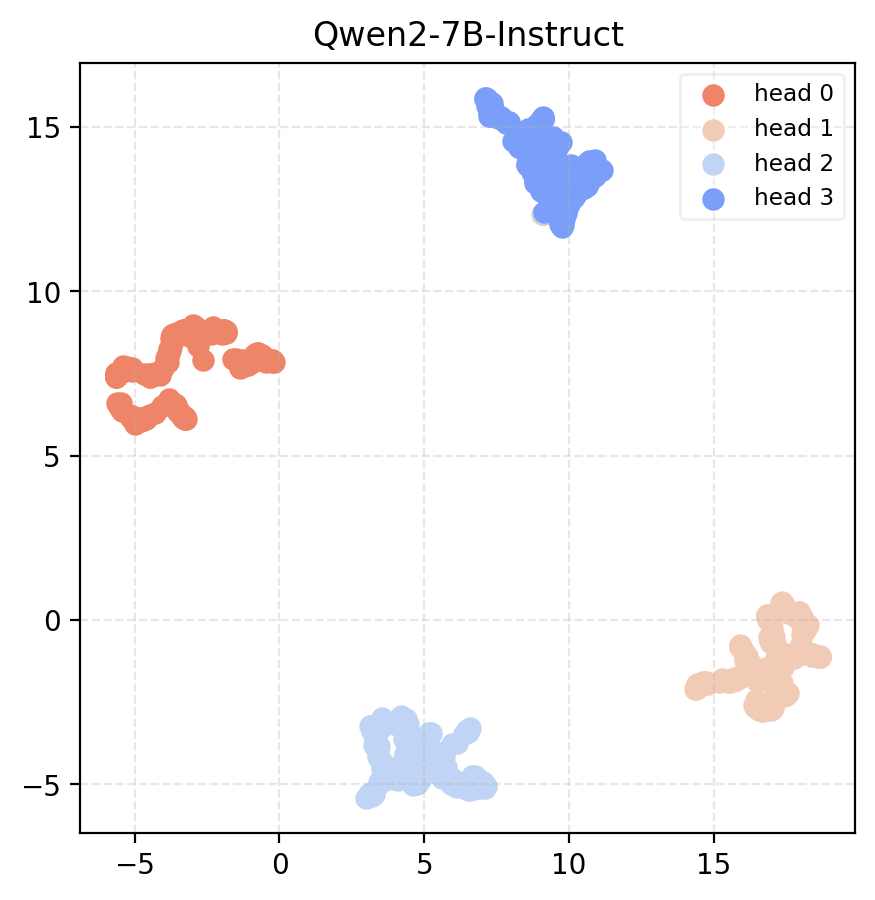

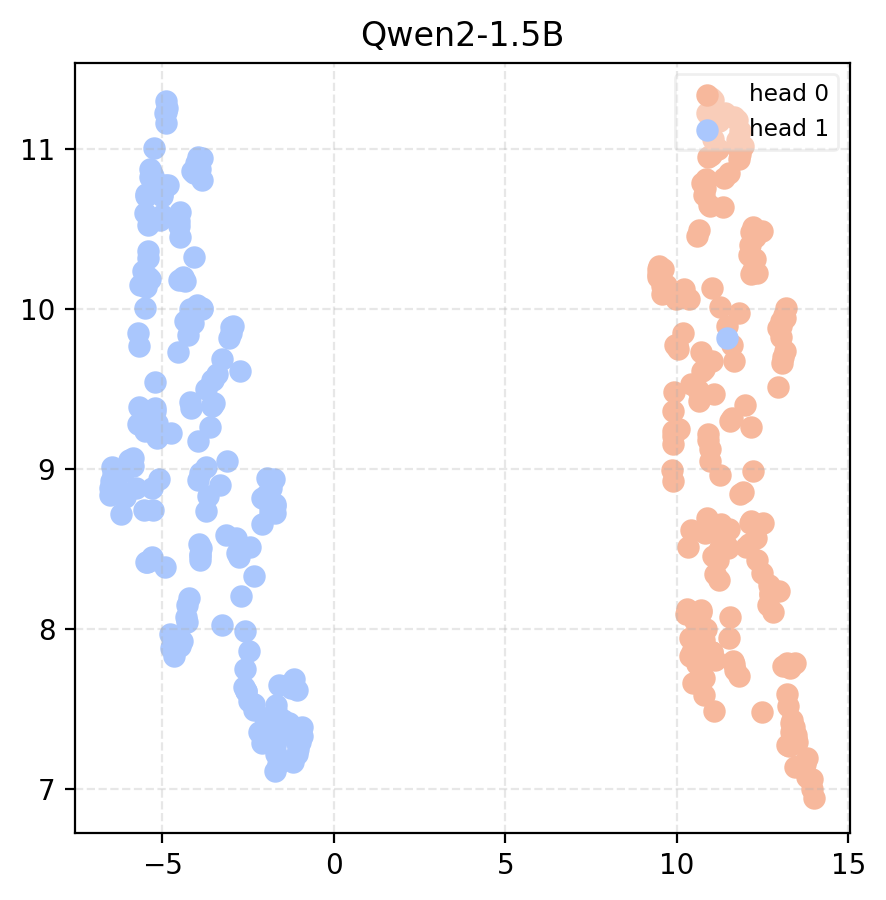

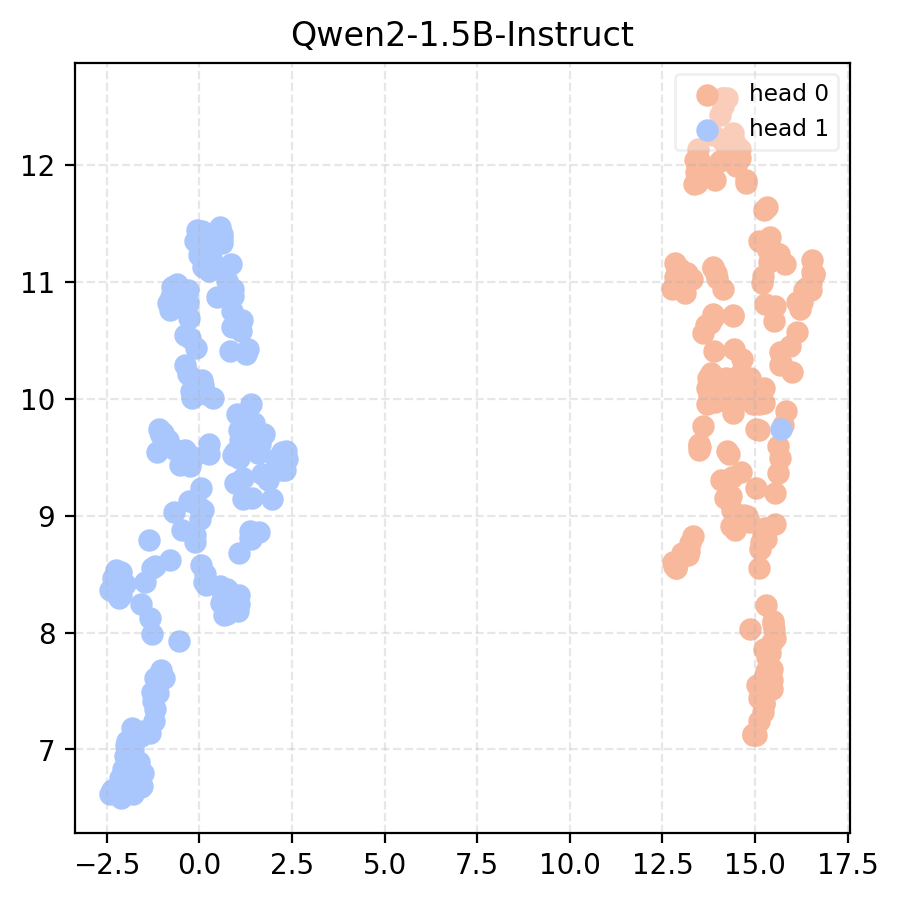

In [24]:
for key in umap_keys_list.keys():
    umap_keys = umap_keys_list[key]
    plt.subplots(figsize=(5,5), dpi=200)
    colors = sns.color_palette('coolwarm_r', umap_keys.shape[0])
    for head_id in range(umap_keys.shape[0]):
        plt.scatter(umap_keys[head_id, :,0], umap_keys[head_id, :,1], color=colors[head_id], s=50, label=f'head {head_id}')
    plt.grid(linestyle="--", alpha=0.3)
    plt.title(key)
    plt.legend(loc="upper right", framealpha=0.3,fontsize='small') 
    plt.show()

## key matrix

### 1. 7b的不同layer的matrix，查看他们的info

### 1. 2.8b 在不同step， 在不同层的key matrix的变化差异

## head冗余查看

### 3. 7b去掉某一层的其他 head，查看模型的效果
- 查看同一层不同head所获得的attn是否一致， 如何判断哪些head是不需要的